In [ ]:
SVC MODEL

In [1]:
import numpy as np 
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
heart_data = pd.read_csv('heart_disease_prediction.csv')
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1280 non-null   int64  
 1   sex       1280 non-null   int64  
 2   cp        1280 non-null   int64  
 3   trestbps  1280 non-null   int64  
 4   chol      1280 non-null   int64  
 5   fbs       1280 non-null   int64  
 6   restecg   1280 non-null   int64  
 7   thalach   1280 non-null   int64  
 8   exang     1280 non-null   int64  
 9   oldpeak   1280 non-null   float64
 10  slope     1280 non-null   int64  
 11  ca        1280 non-null   int64  
 12  thal      1280 non-null   int64  
 13  target    1280 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 140.1 KB


In [3]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']
heart_data['target'].value_counts()

target
1    657
0    623
Name: count, dtype: int64

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [5]:
from sklearn.svm import SVC
clf1 = SVC(kernel="linear")
clf1.fit(X_train,Y_train)

SVC(kernel='linear')

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X and Y are your feature matrix and target vector, respectively
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, stratify=Y_temp, random_state=2)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (1024, 13)
Testing set shape: (128, 13)
Validation set shape: (128, 13)


In [6]:
y_pred= clf1.predict(X_test)
from sklearn.metrics import classification_report

# Evaluate the classification report
classification_rep = classification_report(y_pred,Y_test)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       105
           1       0.92      0.79      0.85       151

    accuracy                           0.84       256
   macro avg       0.83      0.84      0.83       256
weighted avg       0.85      0.84      0.84       256



In [7]:
def predict_heart_disease(model, input_data):
	# Change the input data to a numpy array
	input_data_as_numpy_array = np.asarray(input_data)
	
	# Reshape the numpy array as we are predicting for only one instance
	input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
	
	# Make the prediction
	prediction = model.predict(input_data_reshaped)
	
	# Print the prediction result
	if prediction[0] == 0:
		print('The Person does not have Heart Disease')
	else:
		print('The Person has Heart Disease')

In [8]:
input_data = (60000000002, 0, 0, 140, 268, 0, 0, 100, 0, 3.6, 0, 2, 2)
predict_heart_disease(clf1, input_data)

The Person has Heart Disease


C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
LSTM MODEL

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the data
data = pd.read_csv('heart_disease_prediction.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data["target"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% train, 20% test

# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Function to predict heart disease
def predict_heart_disease(model, input_data):
    input_data = sc.transform(np.array(input_data).reshape(1, -1))
    input_data = np.reshape(input_data, (1, 1, input_data.shape[1]))
    prediction = model.predict(input_data)
    if prediction[0][0] < 0.5:
        print("The person does not have heart disease.")
    else:
        print("The person has heart disease.") 

C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8353 - loss: 0.6234
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8449 - loss: 0.5178
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8362 - loss: 0.4589
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8545 - loss: 0.3998
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8628 - loss: 0.3560
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8664 - loss: 0.3480
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8650 - loss: 0.3494
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8808 - loss: 0.3100
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8585 - loss: 0.3380
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8812 - loss: 0.3130
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8735 - loss: 0.3024
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8969 - lo

In [11]:
input_data = (6000000002, 0, 0, 140, 268, 0, 0, 100, 0, 3.6, 0, 2, 2)
predict_heart_disease(model, input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
The person has heart disease.


In [14]:
from tensorflow.keras.layers import Input

In [21]:
# Function to predict heart disease (assuming the import statement is added)
def predict_heart_disease(model, input_data):
  input_data = sc.transform(np.array(input_data).reshape(1, -1))
  input_data = np.reshape(input_data, (1, 1, input_data.shape[1]))
  prediction = model.predict(input_data)
  if prediction[0][0] < 0.5:
    print("The person does not have heart disease.")
  else:
    print("The person has heart disease.")  

model = Sequential([
  Input(shape=(1, X_train.shape[2])),
  LSTM(50, return_sequences=True),
  Dropout(0.2),  # Dropout layer is now available
  LSTM(50),
  Dropout(0.2),
  Dense(1, activation='sigmoid')
])

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score

# Load the data
data = pd.read_csv('heart_disease_prediction.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data["target"].values

# Standardize features
sc = StandardScaler()
X = sc.fit_transform(X)

# Define the K-Fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Lists to store metrics
accuracies = []
losses = []
precisions = []
recalls = []
f1_scores = []

# K-Fold Cross-Validation
for train, test in kfold.split(X, y):
    # Reshape input data for LSTM
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    
    # Define the LSTM model with dropout and input layer
    model = Sequential([
        Input(shape=(1, X_train.shape[2])),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    # Evaluate the model
    loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
    f1 = f1_score(y_test, (model.predict(X_test) > 0.5).astype(int), average='binary')
    
    # Append scores
    accuracies.append(accuracy)
    losses.append(loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Print the average of the recorded scores
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Loss: {np.mean(losses):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  
Average Accuracy: 0.9516
Average Loss: 0.0984
Average Precision: 0.9531
Average Recall: 0.9528
Average F1-Score: 0.9527


In [ ]:
#Logistic Regression

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the data
data = pd.read_csv('heart_disease_prediction.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data["target"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% train, 20% test

# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize the logistic regression classifier
classifier = LogisticRegression()

# Train the model
classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print("Accuracy:", accuracy * 100)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Function to predict heart disease
def predict_heart_disease(model, input_data):
    # Reshape the input data
    input_data_reshaped = np.array(input_data).reshape(1, -1)
    # Make prediction
    prediction = model.predict(input_data_reshaped)
    if prediction[0] == 0:
        print("The person does not have heart disease.")
    else:
        print("The person has heart disease.")

Accuracy: 83.984375
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.83       124
           1       0.81      0.89      0.85       132

    accuracy                           0.84       256
   macro avg       0.84      0.84      0.84       256
weighted avg       0.84      0.84      0.84       256



In [24]:
input_data = (6200000000, 0, 0, 140, 268, 0, 0, 100, 0, 3.6, 0, 2, 2)
predict_heart_disease(classifier, input_data)

The person has heart disease.


In [ ]:
#Gradient Boosting Classifier

In [25]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Load the data
heart_data = pd.read_csv('heart_disease_prediction.csv')
heart_data.info()

# Separate features and target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']
heart_data['target'].value_counts()

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Initialize Gradient Boosting classifier
clf = GradientBoostingClassifier()

# Train the model
clf.fit(X_train, Y_train)

# Predict on the test set
Y_pred = clf.predict(X_test)

# Evaluate the classification report
from sklearn.metrics import classification_report
classification_rep = classification_report(Y_pred, Y_test)
print("Classification Report:")
print(classification_rep)

# Function to predict heart disease
def predict_heart_disease(model, input_data):
    # Change the input data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)
    
    # Reshape the numpy array as we are predicting for only one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    
    # Make the prediction
    prediction = model.predict(input_data_reshaped)
    
    # Print the prediction result
    if prediction[0] == 0:
        print('The Person does not have Heart Disease')
    else:
        print('The Person has Heart Disease')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1280 non-null   int64  
 1   sex       1280 non-null   int64  
 2   cp        1280 non-null   int64  
 3   trestbps  1280 non-null   int64  
 4   chol      1280 non-null   int64  
 5   fbs       1280 non-null   int64  
 6   restecg   1280 non-null   int64  
 7   thalach   1280 non-null   int64  
 8   exang     1280 non-null   int64  
 9   oldpeak   1280 non-null   float64
 10  slope     1280 non-null   int64  
 11  ca        1280 non-null   int64  
 12  thal      1280 non-null   int64  
 13  target    1280 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 140.1 KB
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       121
           1       0.98      0.96      0.97       135

    accuracy                 

In [26]:

input_data = [62687777, 0, 0, 140, 2009999998, 0, 0, 100, 0, 3.6, 0, 2, 2]
predict_heart_disease(clf, input_data)


The Person does not have Heart Disease


C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [27]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 

In [29]:
data = pd.read_csv('heart_disease_prediction.csv') 
data.head() 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [30]:
data.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,54.429688,0.698438,0.935937,131.497656,245.657813,0.150781,0.523438,148.927344,0.343750,1.078281,1.384375,0.748437,2.321875,0.513281
std,9.061758,0.459116,1.022326,17.860330,50.766664,0.357975,0.528542,23.290467,0.475145,1.182111,0.628293,1.027760,0.614770,0.500019
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.250000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
data.isnull().any() 

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [32]:
X = data.iloc[:,:1279].values 
y = data["target"].values 

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [35]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize the classifier
classifier = Sequential()

# Add the input layer
classifier.add(Dense(units=8, activation='relu', kernel_initializer='uniform', input_shape=(13,)))

# Add the first hidden layer
classifier.add(Dense(units=14, activation='relu', kernel_initializer='uniform'))

# Add the output layer
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

# Compile the classifier
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and preprocessed your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the neural network classifier
classifier = Sequential()
classifier.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1])) # input_dim should match the number of features
classifier.add(Dense(units=14, activation='relu')) # You can adjust the number of units as needed
classifier.add(Dense(units=1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classifier.fit(X_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5623 - loss: 4.9149
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6420 - loss: 0.6374
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - loss: 0.6363
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7113 - loss: 0.5647
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7098 - loss: 0.5558
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7136 - loss: 0.5667
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7177 - loss: 0.5342
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6984 - loss: 0.5835
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7248 - loss: 0.5239
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7560 - loss: 0.4912
Epoch 11/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7552 - loss: 0.5000
Epoch 12/100
112/112 ━━━━━━━━━━━━━━━━━━━━

In [37]:
y_pred = classifier.predict(X_test) 
y_pred = (y_pred > 0.5) 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [39]:
cm = confusion_matrix(y_test,y_pred) 
cm 

array([[182,   0],
       [  0, 202]], dtype=int64)

In [40]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1]) 
print(accuracy*100) 

100.0


In [41]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('heart_disease_prediction.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data["target"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the ANN model
classifier = Sequential()
classifier.add(Dense(units=8, activation='relu', kernel_initializer='uniform', input_shape=(X_train.shape[1],)))
classifier.add(Dense(units=14, activation='relu', kernel_initializer='uniform'))
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classifier.fit(X_train, y_train, batch_size=8, epochs=100)

# Evaluate the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print("Accuracy:", accuracy * 100)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Function to predict on new data
def predict_new_data(new_data):
    # Preprocess new data
    new_data = sc.transform(new_data)
    # Make predictions
    predictions = classifier.predict(new_data)
    predictions = (predictions > 0.5)
    return predictions

# Example usage of predict_new_data function
# new_data = np.array([[...]]) # Input your new data here
# predictions = predict_new_data(new_data)
# print("Predictions:", predictions)


Epoch 1/100


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6367 - loss: 0.6883
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8297 - loss: 0.5390
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.3492
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8537 - loss: 0.3652
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8833 - loss: 0.2977
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3289
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.3116
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8865 - loss: 0.3047
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8811 - loss: 0.3342
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8597 - loss: 0.3293
Epoch 11/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3260
Epoch 12/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [42]:
def predict_heart_disease(model, input_data):
    # Reshape the input data
    input_data_reshaped = np.array(input_data).reshape(1, -1)
    # Make prediction
    prediction = model.predict(input_data_reshaped)
    if prediction[0][0] < 0.5:
        print("The person does not have heart disease.")
    else:
        print("The person has heart disease.")

In [43]:
input_data = (62, 0, 0, 140, 268, 0, 0, 100, 0, 3.6, 0, 2, 2)
predict_heart_disease(classifier, input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
The person does not have heart disease.


In [ ]:
#ANN

In [44]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 

In [45]:
data = pd.read_csv('heart_disease_prediction.csv') 
data.head() 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [46]:
data.describe() 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,54.429688,0.698438,0.935937,131.497656,245.657813,0.150781,0.523438,148.927344,0.343750,1.078281,1.384375,0.748437,2.321875,0.513281
std,9.061758,0.459116,1.022326,17.860330,50.766664,0.357975,0.528542,23.290467,0.475145,1.182111,0.628293,1.027760,0.614770,0.500019
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.250000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
data.isnull().any() 

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [48]:
X = data.iloc[:,:1279].values 
y = data["target"].values 

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [51]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize the classifier
classifier = Sequential()

# Add the input layer
classifier.add(Dense(units=8, activation='relu', kernel_initializer='uniform', input_shape=(13,)))

# Add the first hidden layer
classifier.add(Dense(units=14, activation='relu', kernel_initializer='uniform'))

# Add the output layer
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

# Compile the classifier
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and preprocessed your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the neural network classifier
classifier = Sequential()
classifier.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1])) # input_dim should match the number of features
classifier.add(Dense(units=14, activation='relu')) # You can adjust the number of units as needed
classifier.add(Dense(units=1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classifier.fit(X_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5449 - loss: 3.6940
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6675 - loss: 0.6775
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6264 - loss: 0.6370
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - loss: 0.5848
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - loss: 0.5846
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6891 - loss: 0.5716
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7418 - loss: 0.5139
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7151 - loss: 0.5555
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7621 - loss: 0.4776
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7071 - loss: 0.5462
Epoch 11/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7634 - loss: 0.4842
Epoch 12/100
112/112 ━━━━━━━━━━━━━━━━━━━━

In [53]:
y_pred = classifier.predict(X_test) 
y_pred = (y_pred > 0.5) 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [54]:
cm = confusion_matrix(y_test,y_pred) 
cm 


array([[182,   0],
       [  0, 202]], dtype=int64)

In [55]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1]) 
print(accuracy*100) 

100.0


In [56]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('heart_disease_prediction.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data["target"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the ANN model
classifier = Sequential()
classifier.add(Dense(units=8, activation='relu', kernel_initializer='uniform', input_shape=(X_train.shape[1],)))
classifier.add(Dense(units=14, activation='relu', kernel_initializer='uniform'))
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classifier.fit(X_train, y_train, batch_size=8, epochs=100)

# Evaluate the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print("Accuracy:", accuracy * 100)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Function to predict on new data
def predict_new_data(new_data):
    # Preprocess new data
    new_data = sc.transform(new_data)
    # Make predictions
    predictions = classifier.predict(new_data)
    predictions = (predictions > 0.5)
    return predictions

# Example usage of predict_new_data function
# new_data = np.array([[...]]) # Input your new data here
# predictions = predict_new_data(new_data)
# print("Predictions:", predictions)


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6612 - loss: 0.6877
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8268 - loss: 0.5254
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8397 - loss: 0.3867
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8795 - loss: 0.3177
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8948 - loss: 0.3027
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8878 - loss: 0.3200
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8953 - loss: 0.2893
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3294
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3060
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8851 - loss: 0.3040
Epoch 11/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3118
Epoch 12/100
112/112 ━━━━━━━━━━━━━━━━━━━━

In [57]:
def predict_heart_disease(model, input_data):
    # Reshape the input data
    input_data_reshaped = np.array(input_data).reshape(1, -1)
    # Make prediction
    prediction = model.predict(input_data_reshaped)
    if prediction[0][0] < 0.5:
        print("The person does not have heart disease.")
    else:
        print("The person has heart disease.")

In [125]:
input_data = (62, 0, 0, 140, 268, 0, 0, 100, 0, 3.6, 0, 2, 2)
predict_heart_disease(classifier, input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The person does not have heart disease.


In [69]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your data loaded into X and y
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to evaluate and store results
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return {"Model": model.__class__.__name__, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1}

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "ANN": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Evaluate each model and store results
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    results.append(evaluate_model(model, X_val, y_val))

# Create a pandas DataFrame from the results
df_results = pd.DataFrame(results)

# Print the DataFrame with clear formatting
print(df_results.to_string(index=False))


                     Model  Accuracy  Precision   Recall       F1
        LogisticRegression  0.820312   0.829630 0.829630 0.829630
                       SVC  0.742188   0.731544 0.807407 0.767606
GradientBoostingClassifier  0.976562   0.992366 0.962963 0.977444
             MLPClassifier  0.828125   0.909910 0.748148 0.821138


In [70]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have your data loaded into X and y
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_lstm = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

# Define and compile the LSTM model
model_lstm = Sequential([
    LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(units=1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val))

# Evaluate the LSTM model
y_pred_lstm = (model_lstm.predict(X_val_lstm) > 0.5).astype("int32")
accuracy_lstm = accuracy_score(y_val, y_pred_lstm)
precision_lstm = precision_score(y_val, y_pred_lstm)
recall_lstm = recall_score(y_val, y_pred_lstm)
f1_lstm = f1_score(y_val, y_pred_lstm)

# Create a DataFrame to store results
df_results = pd.DataFrame([
    {"Model": "LSTM", "Accuracy": accuracy_lstm, "Precision": precision_lstm, "Recall": recall_lstm, "F1": f1_lstm}
])

# Print the DataFrame with clear formatting
print(df_results.to_string(index=False))


Epoch 1/10


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5558 - loss: 0.6785 - val_accuracy: 0.8008 - val_loss: 0.6073
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7999 - loss: 0.5812 - val_accuracy: 0.8438 - val_loss: 0.5225
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.4970 - val_accuracy: 0.8359 - val_loss: 0.4537
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8330 - loss: 0.4280 - val_accuracy: 0.8555 - val_loss: 0.4060
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8427 - loss: 0.3902 - val_accuracy: 0.8594 - val_loss: 0.3762
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8551 - loss: 0.3536 - val_accuracy: 0.8633 - val_loss: 0.3576
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8623 - loss: 0.3266 - val_accuracy: 0.8555 - val_loss: 0.3457
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8458 - loss: 0.3375 - val_accuracy: 0.8633 - val_loss: 0.3397
Ep

In [74]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have your data loaded into X and y
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_lstm = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

# Define a function to evaluate and store results
def evaluate_model(model, X_val, y_val):
    if isinstance(model, Sequential):
        y_pred = (model.predict(X_val) > 0.5).astype("int32")
    elif hasattr(model, 'predict'):
        y_pred = model.predict(X_val)
    else:
        raise ValueError("Model type not recognized.")
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return {"Model": model.__class__.__name__, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1}

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "ANN": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "LSTM": Sequential([
        LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dense(units=1, activation='sigmoid')
    ])
}

# Train all models
for name, model in models.items():
    if name != "LSTM":
        model.fit(X_train_scaled, y_train)
    else:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val))

# Evaluate each model and store results
results = []
for name, model in models.items():
    results.append(evaluate_model(model, X_val_scaled if name != "LSTM" else X_val_lstm, y_val))

# Create a pandas DataFrame from the results
df_results = pd.DataFrame(results)

# Find the best model based on F1-score
best_model = df_results.loc[df_results['F1'].idxmax()]

# Print the best model
print("Best Model based on F1-score:")
print(best_model)


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6565 - loss: 0.6689 - val_accuracy: 0.7734 - val_loss: 0.6081
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8009 - loss: 0.5750 - val_accuracy: 0.7891 - val_loss: 0.5280
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8316 - loss: 0.4933 - val_accuracy: 0.8320 - val_loss: 0.4634
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8528 - loss: 0.4315 - val_accuracy: 0.8359 - val_loss: 0.4154
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8574 - loss: 0.3809 - val_accuracy: 0.8516 - val_loss: 0.3841
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8534 - loss: 0.3665 - val_accuracy: 0.8672 - val_loss: 0.3647
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8539 - loss: 0.3473 - val_accuracy: 0.8672 - val_loss: 0.3508
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8728 - loss: 0.3129 - val_accuracy: 0.8594 - val_loss

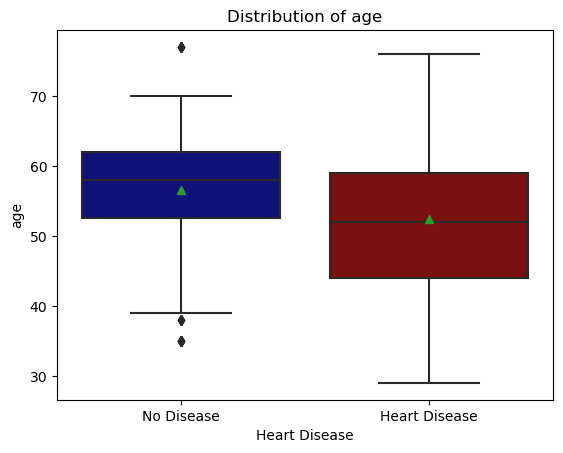

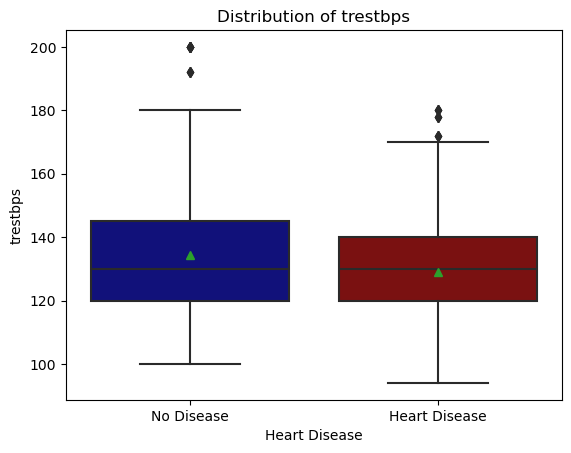

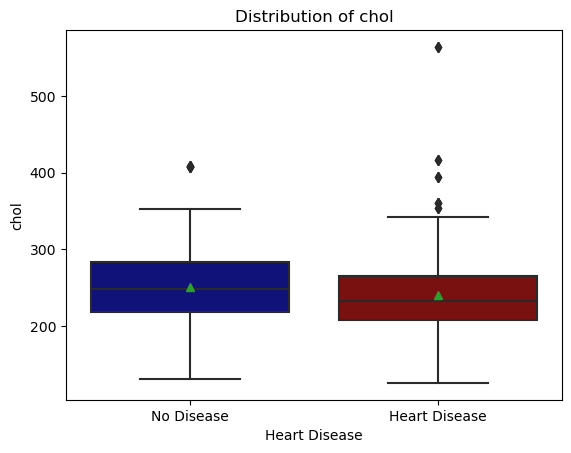

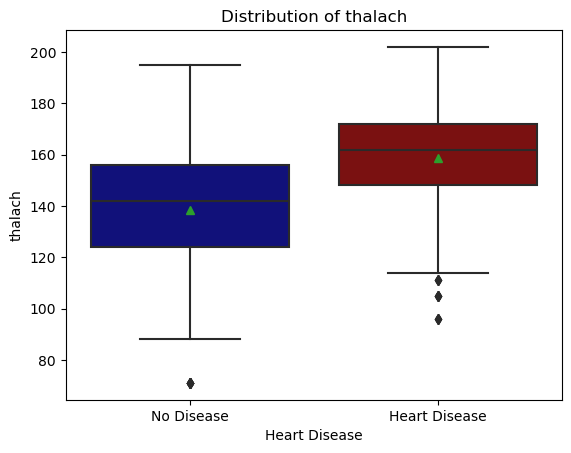

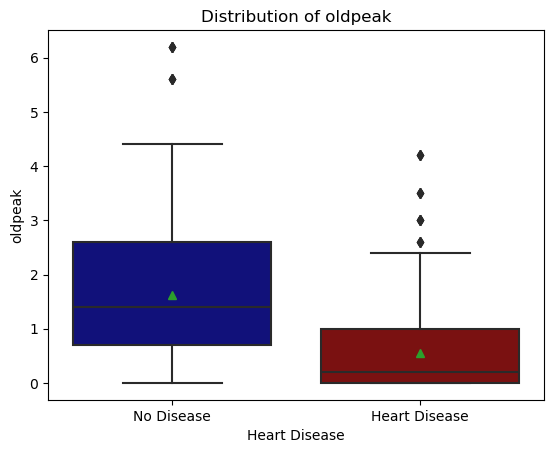

<Figure size 640x480 with 0 Axes>

In [1]:
import seaborn as sns  # Import seaborn for box plots
import pandas as pd
import matplotlib.pyplot as plt

# Load your heart disease data (replace 'heart_disease_prediction.csv' with your actual file path)
data = pd.read_csv('heart_disease_prediction.csv')

# Separate features and target
features = data.iloc[:, :-1]  # All columns except the last (target)
target = data["target"]

# Define features you want to visualize distributions for
features_to_visualize = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Define dark red and dark blue colors
dark_red = 'darkred'
dark_blue = 'darkblue'


def create_distribution_plot(feature):
  """
  Creates a box plot to visualize the distribution of a feature.

  Args:
      feature: The name of the feature to visualize.
  """

  # Separate data for No Disease and Heart Disease cases
  no_disease_data = features[feature][target == 0]
  heart_disease_data = features[feature][target == 1]

  # Create a box plot using seaborn
  fig, ax = plt.subplots()
  sns.boxplot(
      x = "target",
      y = feature,
      showmeans=True,  # Show mean values as diamonds
      data=data[[feature, "target"]],
      palette=[dark_blue, dark_red]  # Set colors for No Disease and Heart Disease
  )

  # Customize the plot (optional)
  ax.set_xlabel("Heart Disease")
  ax.set_ylabel(feature)
  ax.set_title(f'Distribution of {feature}')
  plt.xticks([0, 1], ["No Disease", "Heart Disease"])  # Set tick labels for target variable

  # Display the plot
  plt.show()


# Loop through each feature and create a box plot
for feature in features_to_visualize:
  create_distribution_plot(feature)

# Clear the plot for the next iteration (optional)
plt.clf()


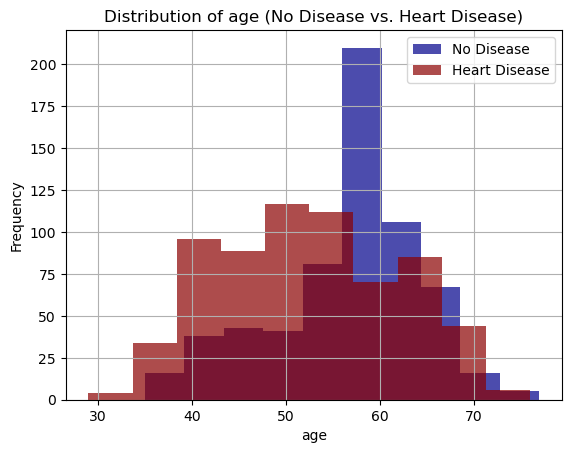

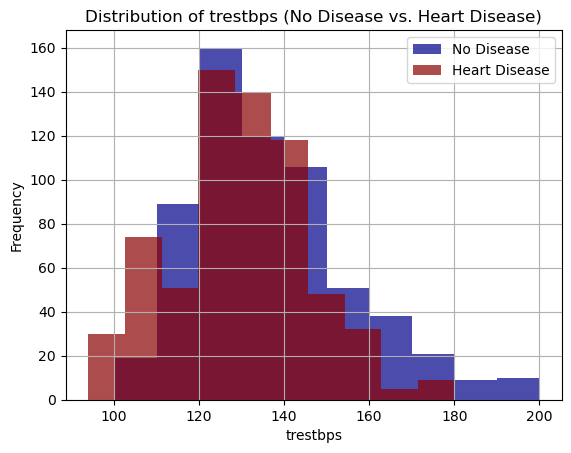

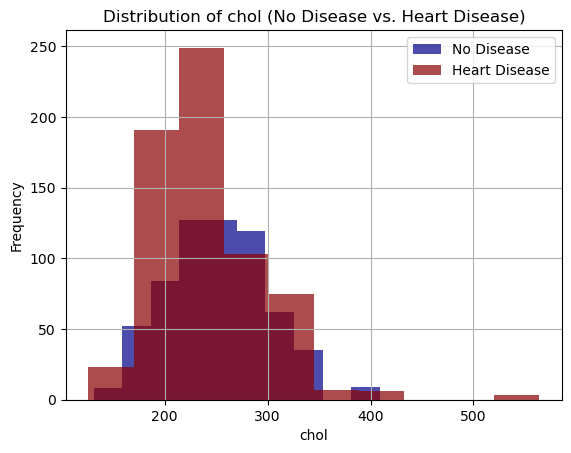

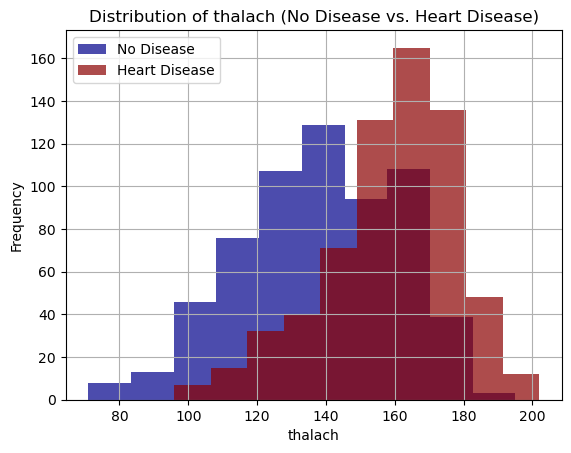

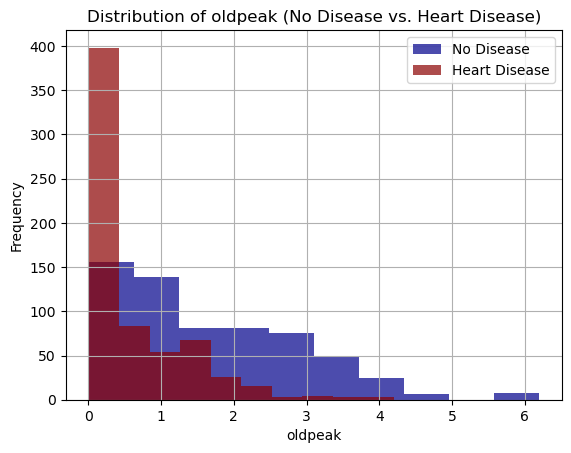

<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your heart disease data (replace 'heart_disease_prediction.csv' with your actual file path)
data = pd.read_csv('heart_disease_prediction.csv')

# Separate features and target
features = data.iloc[:, :-1]  # All columns except the last (target)
target = data["target"]

# Define features you want to visualize distributions for
features_to_visualize = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Define dark red and dark blue colors
dark_red = 'darkred'
dark_blue = 'darkblue'

# Loop through each feature and create a distribution plot
for feature in features_to_visualize:
    # Separate data for No Disease and Heart Disease cases (assuming your target has values like 0 and 1)
    no_disease_data = features[feature][target == 0]
    heart_disease_data = features[feature][target == 1]

    # Create a distribution plot for each case with dark colors
    plt.hist(no_disease_data, label='No Disease', alpha=0.7, color=dark_blue)
    plt.hist(heart_disease_data, label='Heart Disease', alpha=0.7, color=dark_red)

    # Set background color to white
    plt.style.use('default')  # Matplotlib default white background style

    # Add grid lines for readability
    plt.grid(True)

    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} (No Disease vs. Heart Disease)')
    plt.legend()

    # Explanation of the output:
    # This plot shows the distribution of the feature "{feature}" for patients with and without heart disease.
    # The x-axis represents the values of the feature.
    # The y-axis represents the frequency (count) of each value.
    # The blue bars represent the distribution for patients without heart disease (No Disease).
    # The red bars represent the distribution for patients with heart disease (Heart Disease).
    # By looking at the distribution of each class, you can see if there are any patterns or differences
    # in the distribution of the feature between the two groups.

    plt.show()

    # Clear the plot for the next iteration
    plt.clf()

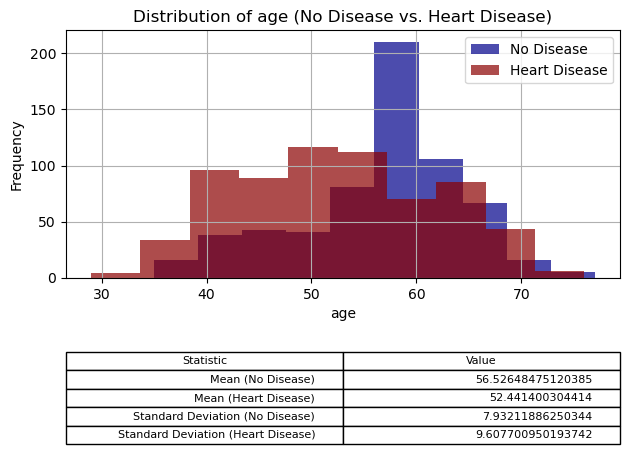

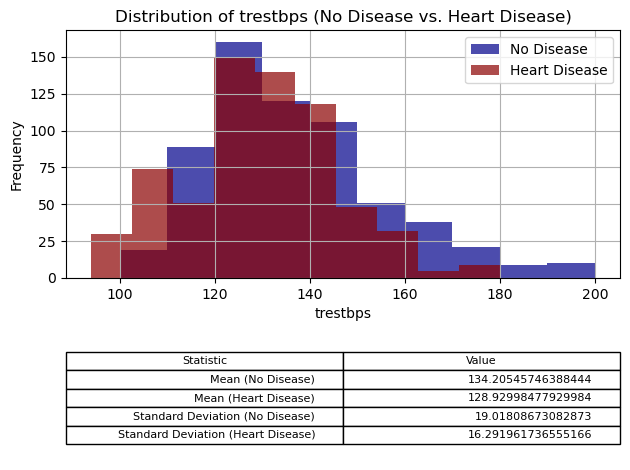

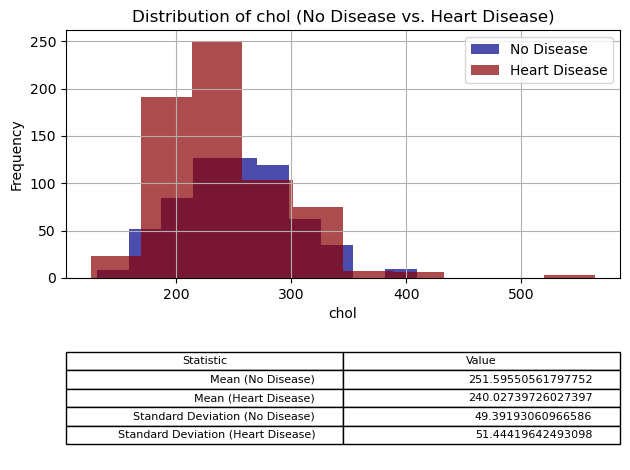

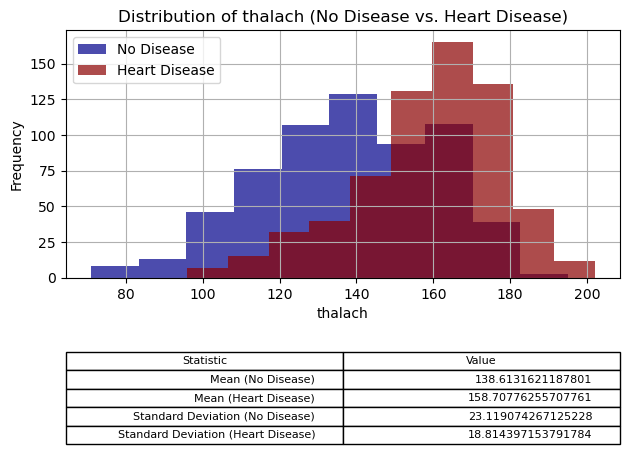

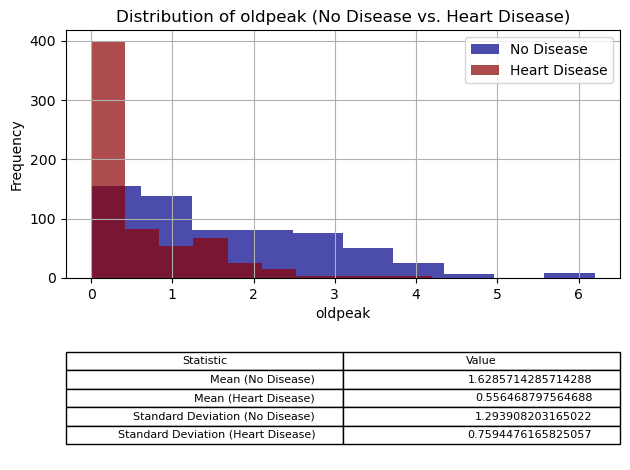

<Figure size 640x480 with 0 Axes>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your heart disease data (replace 'heart_disease_prediction.csv' with your actual file path)
data = pd.read_csv('heart_disease_prediction.csv')

# Separate features and target
features = data.iloc[:, :-1]  # All columns except the last (target)
target = data["target"]

# Define features you want to visualize distributions for
features_to_visualize = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Define dark red and dark blue colors
dark_red = 'darkred'
dark_blue = 'darkblue'


def create_distribution_plot_and_table(feature):
  """
  Creates a distribution plot and table for a given feature.

  Args:
      feature: The name of the feature to visualize.
  """

  # Separate data for No Disease and Heart Disease cases
  no_disease_data = features[feature][target == 0]
  heart_disease_data = features[feature][target == 1]

  # Create the figure with a subplot for the chart and space for the table
  fig, (ax, table_ax) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})

  # Create the distribution plot
  ax.hist(no_disease_data, label='No Disease', alpha=0.7, color=dark_blue)
  ax.hist(heart_disease_data, label='Heart Disease', alpha=0.7, color=dark_red)
  ax.set_xlabel(feature)
  ax.set_ylabel('Frequency')
  ax.set_title(f'Distribution of {feature} (No Disease vs. Heart Disease)')
  ax.legend()
  ax.grid(True)

  # Data for the table (modify based on your desired statistics)
  table_data = [
      ('Mean (No Disease)', no_disease_data.mean()),
      ('Mean (Heart Disease)', heart_disease_data.mean()),
      ('Standard Deviation (No Disease)', no_disease_data.std()),
      ('Standard Deviation (Heart Disease)', heart_disease_data.std()),
  ]

  # Create the table using Pandas Styler for formatting (optional)
  table = pd.DataFrame(table_data, columns=['Statistic', 'Value'])  # Create DataFrame directly

  # Add the table to the subplot for the table
  table_ax.axis('off')  # Turn off table axis for cleaner appearance
  table_ax.table(colLabels=table.columns, cellText=table.values, loc='center')

  # Adjust layout to prevent overlapping elements
  plt.tight_layout()
  plt.show()


# Loop through each feature and create a distribution plot and table
for feature in features_to_visualize:
  create_distribution_plot_and_table(feature)

# Clear the plot for the next iteration (optional)
plt.clf()


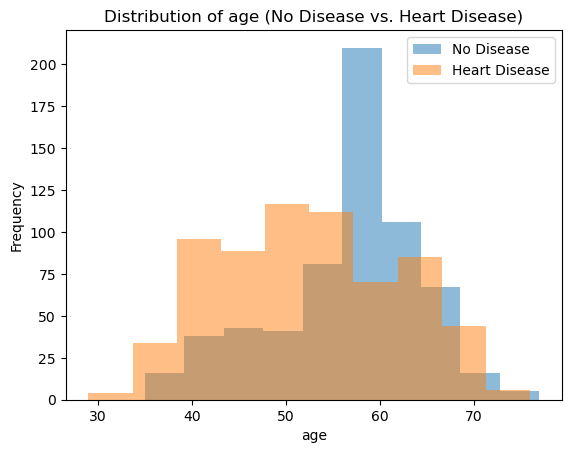

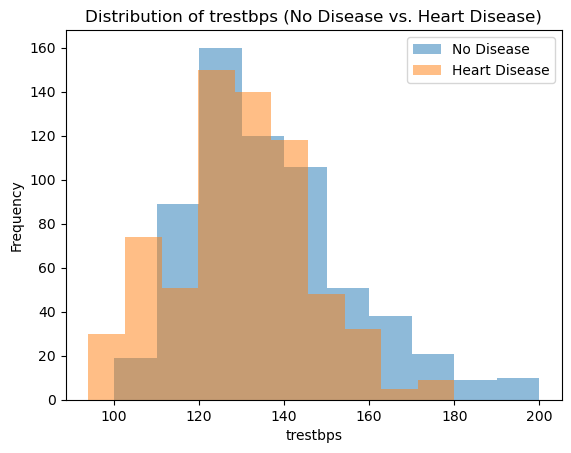

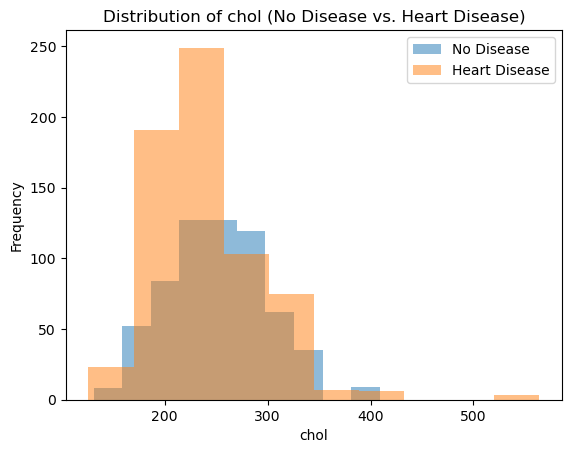

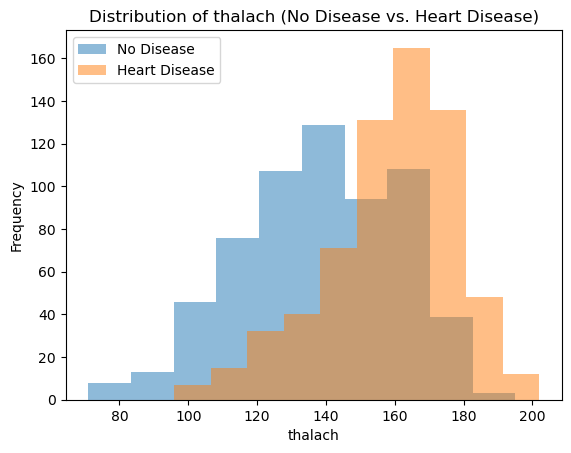

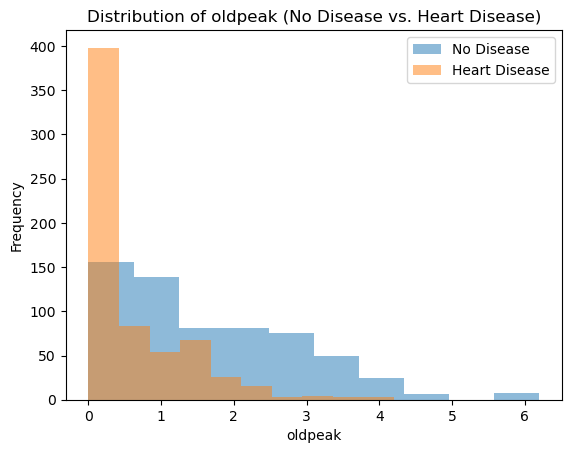

<Figure size 640x480 with 0 Axes>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your heart disease data (replace 'heart_disease_prediction.csv' with your actual file path)
data = pd.read_csv('heart_disease_prediction.csv')

# Separate features and target
features = data.iloc[:, :-1]  # All columns except the last (target)
target = data["target"]

# Define features you want to visualize distributions for
features_to_visualize = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Loop through each feature and create a distribution plot
for feature in features_to_visualize:
  # Separate data for No Disease and Heart Disease cases (assuming your target has values like 0 and 1)
  no_disease_data = features[feature][target == 0]
  heart_disease_data = features[feature][target == 1]

  # Create a distribution plot for each case (No Disease and Heart Disease)
  plt.hist(no_disease_data, label='No Disease', alpha=0.5)
  plt.hist(heart_disease_data, label='Heart Disease', alpha=0.5)
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {feature} (No Disease vs. Heart Disease)')
  plt.legend()
  plt.show()

  # Clear the plot for the next iteration
  plt.clf()


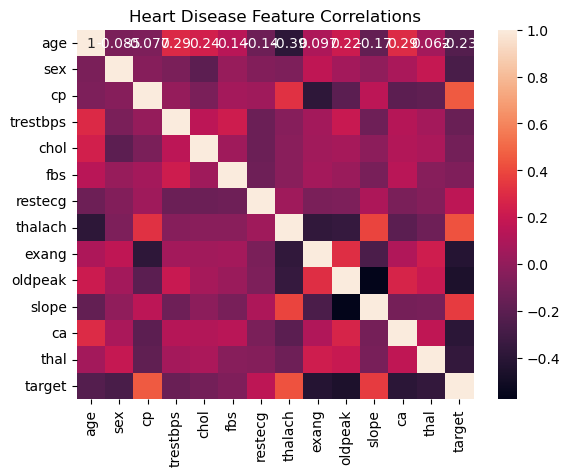

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization

# Load your heart disease data (replace 'heart_disease_prediction.csv' with your actual file path)
data = pd.read_csv('heart_disease_prediction.csv')

# Create the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap visualization using Seaborn
sns.heatmap(correlation_matrix, annot=True)  # Add annotations for correlation values (optional)
plt.title('Heart Disease Feature Correlations')
plt.show()


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


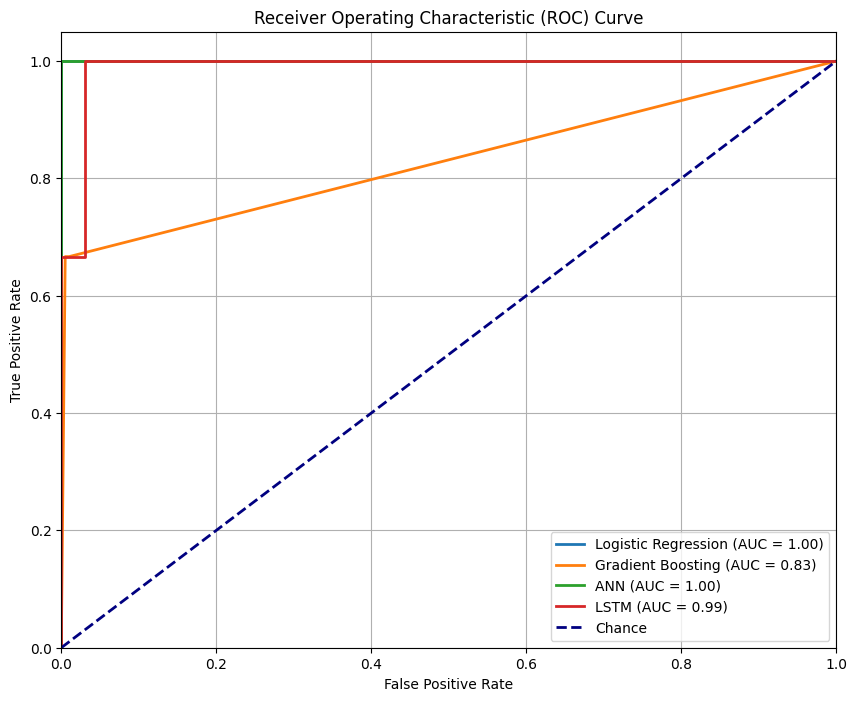

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical

# Simulate binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Binarize the labels for ROC curve calculation
y_bin = label_binarize(y_val, classes=[0, 1])
n_classes = y_bin.shape[1]

# Initialize models
log_reg = LogisticRegression()
gradient_boost = GradientBoostingClassifier()
ann = Sequential([Dense(10, activation='relu', input_dim=20),
                  Dense(1, activation='sigmoid')])
lstm_model = Sequential([LSTM(10, input_shape=(1, 20)),  # Reshape X for LSTM: Use X.reshape(-1, 1, 20)
                         Dense(1, activation='sigmoid')])

# Train models
log_reg.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train.reshape(-1, 1, 20), y_train, epochs=10, batch_size=32, verbose=0)

# Predict probabilities
y_scores_lr = log_reg.predict_proba(X_val)[:, 1]
y_scores_gb = gradient_boost.predict_proba(X_val)[:, 1]
y_scores_ann = ann.predict(X_val).ravel()
y_scores_lstm = lstm_model.predict(X_val.reshape(-1, 1, 20)).ravel()

# Create figure for plotting
plt.figure(figsize=(10, 8))
models_scores = [('Logistic Regression', y_scores_lr),
                 ('Gradient Boosting', y_scores_gb),
                 ('ANN', y_scores_ann),
                 ('LSTM', y_scores_lstm)]

# Plot ROC curve for each model
for name, y_scores in models_scores:
    fpr, tpr, _ = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random guessing curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8812 - loss: 0.2965 - val_accuracy: 0.8438 - val_loss: 0.3295
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8888 - loss: 0.2886 - val_accuracy: 0.8438 - val_loss: 0.3264
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8653 - loss: 0.3078 - val_accuracy: 0.8438 - val_loss: 0.3222
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8781 - loss: 0.2956 - val_accuracy: 0.8516 - val_loss: 0.3185
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8895 - loss: 0.2653 - val_accuracy: 0.8594 - val_loss: 0.3150
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8960 - loss: 0.2751 - val_accuracy: 0.8750 - val_loss: 0.3113
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9114 - loss: 0.2649 - val_accuracy: 0.8789 - val_loss: 0.3071
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9147 - loss: 0.2640 - val_accuracy: 0.8789 - val_loss

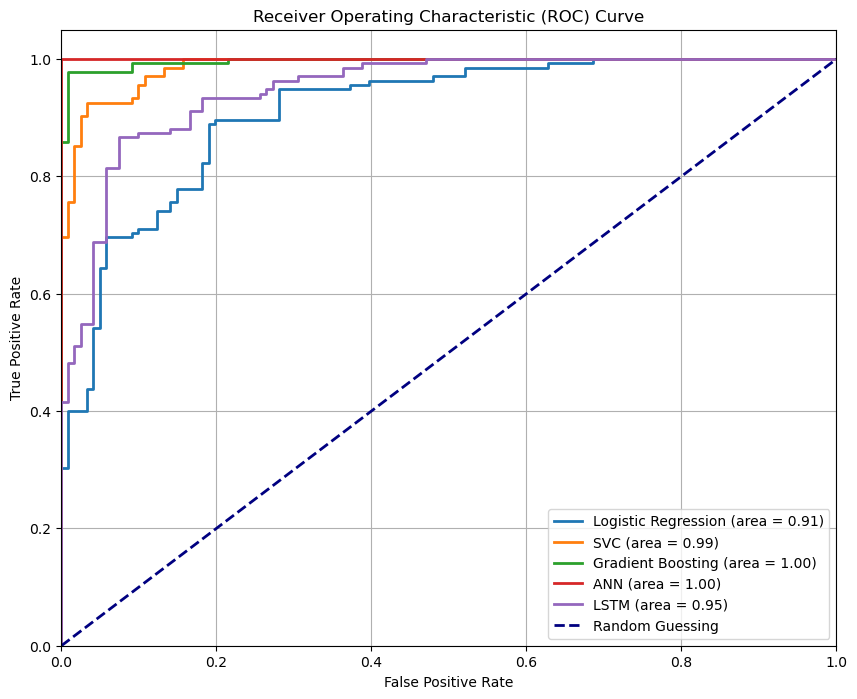

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for ROC curve calculation
y_bin = label_binarize(y_val, classes=[0, 1])
n_classes = y_bin.shape[1]

# Create figure and axes
plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
for name, model in models.items():
    if name != "LSTM":
        if hasattr(model, 'fit'):
            model.fit(X_train_scaled, y_train)
        
        if hasattr(model, "decision_function"):
            y_score = model.decision_function(X_val_scaled)
        elif hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_val_scaled)[:, 1]
        else:
            raise ValueError("Model does not have decision_function or predict_proba method.")
    else:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val))
        y_score = model.predict(X_val_lstm)

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

# Plot random guessing ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, ax, vmin=None, vmax=None):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', cbar=False, ax=ax,
                vmin=vmin, vmax=vmax)
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])

# Assuming y_val is your true labels and you have predictions for each model
# Replace 'model_predictions' with your actual predictions
y_pred_lr = logistic_model.predict(X_val)
y_pred_gb = gradient_boosting_model.predict(X_val)
y_pred_ann = ann_model.predict(X_val)
y_pred_lstm = lstm_model.predict(X_val)

# Compute confusion matrices
cm_lr = confusion_matrix(y_val, y_pred_lr)
cm_gb = confusion_matrix(y_val, y_pred_gb)
cm_ann = confusion_matrix(y_val, y_pred_ann)
cm_lstm = confusion_matrix(y_val, y_pred_lstm)

# Get global min and max values for consistent color scale across matrices
vmin = min(cm_lr.min(), cm_gb.min(), cm_ann.min(), cm_lstm.min())
vmax = max(cm_lr.max(), cm_gb.max(), cm_ann.max(), cm_lstm.max())

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plot_confusion_matrix(cm_lr, 'Logistic Regression', axs[0, 0], vmin, vmax)
plot_confusion_matrix(cm_gb, 'Gradient Boosting', axs[0, 1], vmin, vmax)
plot_confusion_matrix(cm_ann, 'ANN', axs[1, 0], vmin, vmax)
plot_confusion_matrix(cm_lstm, 'LSTM', axs[1, 1], vmin, vmax)

# Adjust layout
plt.tight_layout()
plt.show()


NameError: name 'logistic_model' is not defined

In [ ]:
Model performance on the validation set

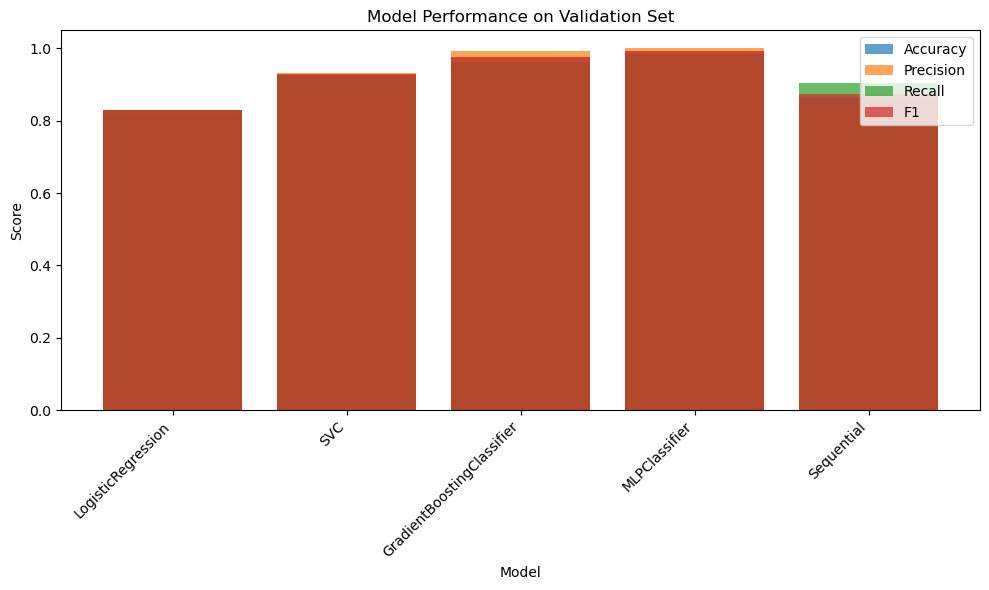

In [87]:
import matplotlib.pyplot as plt

# Define the metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

# Create a bar plot for each metric
plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.bar(df_results['Model'], df_results[metric], alpha=0.7, label=metric)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance on Validation Set')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('heart_disease_prediction.csv')

# Split dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'LSTM': Sequential([
        LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dense(units=1, activation='sigmoid')
    ])
}

# Define evaluation metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1': f1_score
}

# Evaluate each classifier
results = {}
for clf_name, clf in classifiers.items():
    if clf_name != 'LSTM':
        clf_results = {'Model': clf_name}
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        for metric_name, metric_func in metrics.items():
            clf_results[metric_name] = metric_func(y_test, y_pred)
        results[clf_name] = clf_results
    else:
        clf_results = {'Model': clf_name}
        clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        clf.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))
        y_pred = (clf.predict(X_test_lstm) > 0.5).astype("int32")
        for metric_name, metric_func in metrics.items():
            clf_results[metric_name] = metric_func(y_test, y_pred)
        results[clf_name] = clf_results

# Convert results to DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index')

# Print results
print(df_results)


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7335 - loss: 0.6604 - val_accuracy: 0.8164 - val_loss: 0.5896
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8129 - loss: 0.5606 - val_accuracy: 0.8203 - val_loss: 0.5061
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8189 - loss: 0.4802 - val_accuracy: 0.8281 - val_loss: 0.4411
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8426 - loss: 0.4136 - val_accuracy: 0.8438 - val_loss: 0.3968
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8301 - loss: 0.3892 - val_accuracy: 0.8555 - val_loss: 0.3715
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8518 - loss: 0.3627 - val_accuracy: 0.8633 - val_loss: 0.3532
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8685 - loss: 0.3300 - val_accuracy: 0.8555 - val_loss: 0.3437
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8494 - loss: 0.3359 - val_accuracy: 0.8633 - val_loss

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
df = pd.read_csv('heart_disease_prediction.csv')

# Split dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix - {clf_name}: \n{cm}\n')

# If LSTM is needed, adjust and train separately due to different data preparation needs
lstm_model = Sequential([
    LSTM(units=50, return_sequences=False, input_shape=(1, X_train_scaled.shape[1])),
    Dense(units=1, activation='sigmoid')
])

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Compile and train LSTM
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Predict and calculate confusion matrix for LSTM
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
print(f'Confusion Matrix - LSTM: \n{cm_lstm}\n')


Confusion Matrix - Logistic Regression: 
[[ 96  29]
 [ 14 117]]

Confusion Matrix - SVM: 
[[115  10]
 [  6 125]]

Confusion Matrix - Random Forest: 
[[125   0]
 [  0 131]]

Confusion Matrix - Gradient Boosting: 
[[122   3]
 [  3 128]]

Epoch 1/10


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6535 - loss: 0.6698
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.5628
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8100 - loss: 0.4912
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8100 - loss: 0.4392
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8362 - loss: 0.3919
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8447 - loss: 0.3702
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8601 - loss: 0.3461
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8592 - loss: 0.3254
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3285
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8756 - loss: 0.3122
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Confusion Matrix - LSTM: 
[[ 99  26]
 [ 11 120]]



C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


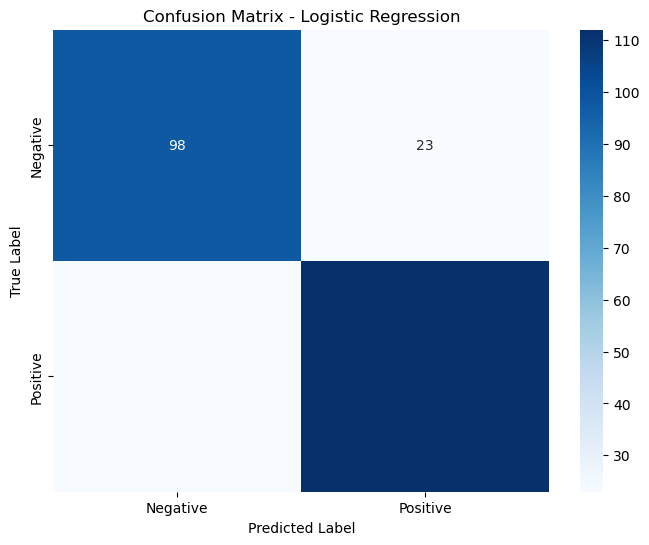

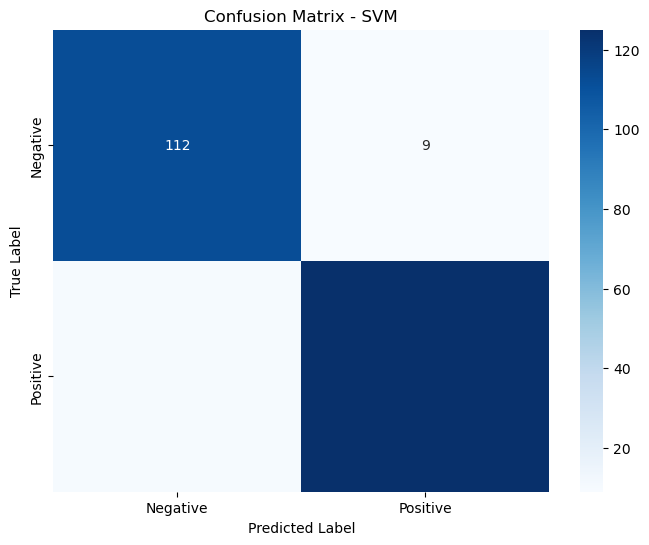

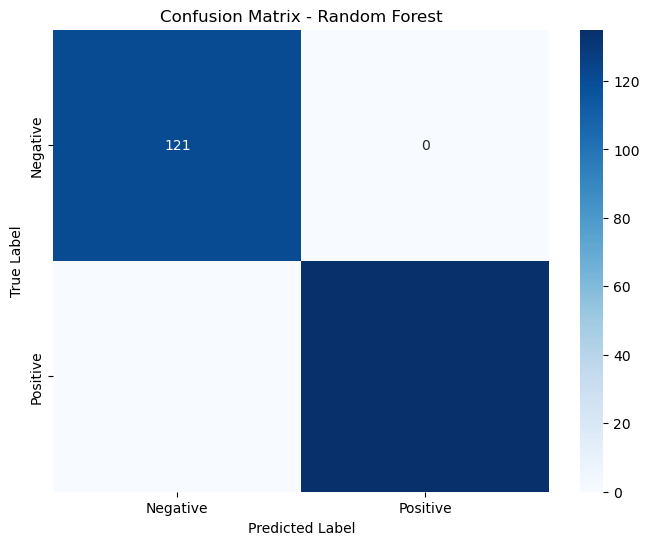

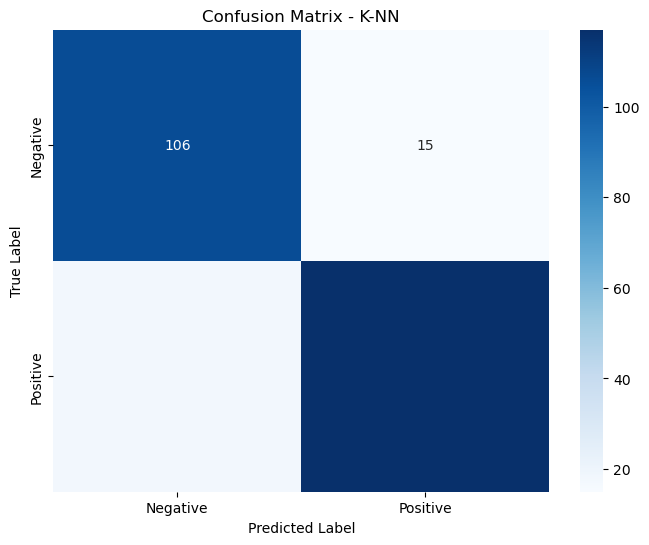

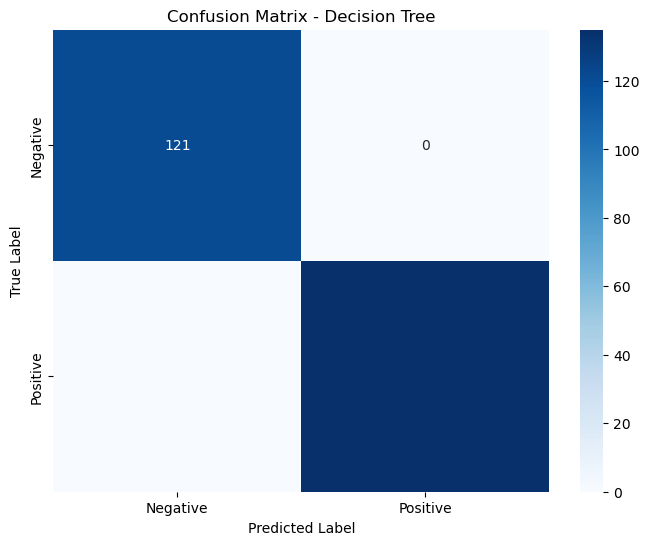

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6733 - loss: 0.6603 - val_accuracy: 0.8125 - val_loss: 0.5857
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8092 - loss: 0.5670 - val_accuracy: 0.8320 - val_loss: 0.5074
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8065 - loss: 0.4907 - val_accuracy: 0.8398 - val_loss: 0.4442
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7974 - loss: 0.4388 - val_accuracy: 0.8281 - val_loss: 0.4020
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8298 - loss: 0.3781 - val_accuracy: 0.8477 - val_loss: 0.3751
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8567 - loss: 0.3550 - val_accuracy: 0.8516 - val_loss: 0.3588
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8649 - loss: 0.3445 - val_accuracy: 0.8516 - val_loss: 0.3485
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8484 - loss: 0.3402 - val_accuracy: 0.8516 - val_loss

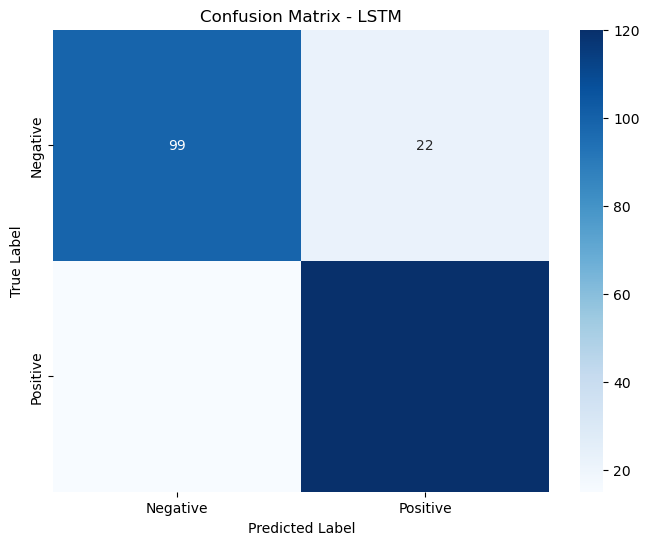

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('heart_disease_prediction.csv')

# Split dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'LSTM': Sequential([
        LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dense(units=1, activation='sigmoid')
    ])
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    if clf_name != 'LSTM':
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        clf.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))
        y_pred = (clf.predict(X_test_lstm) > 0.5).astype("int32")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


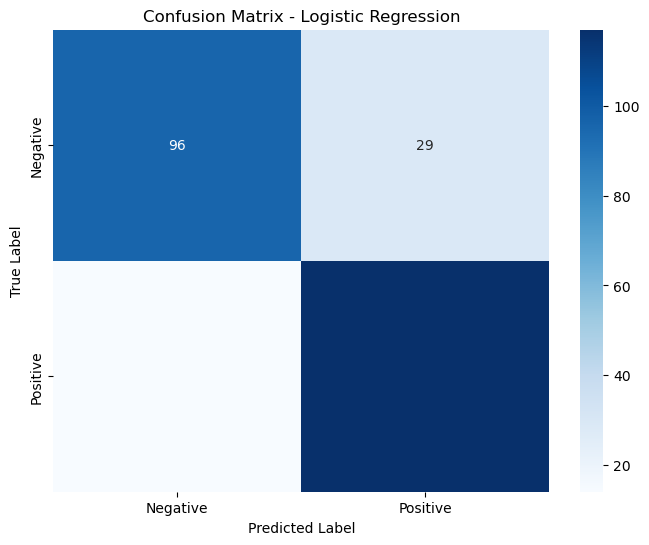

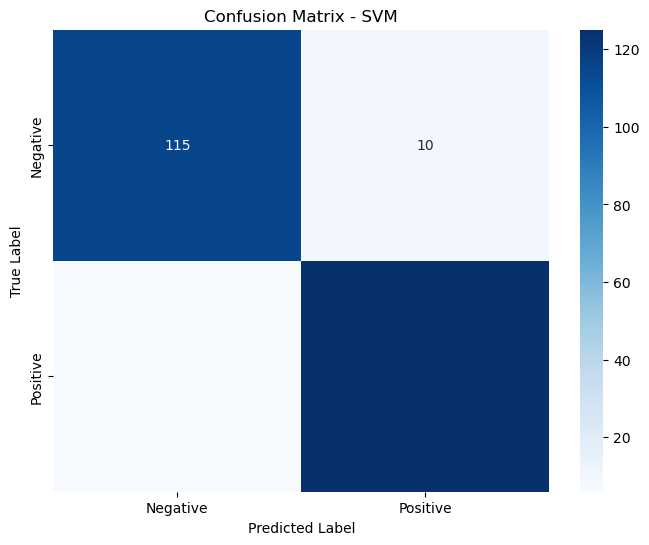

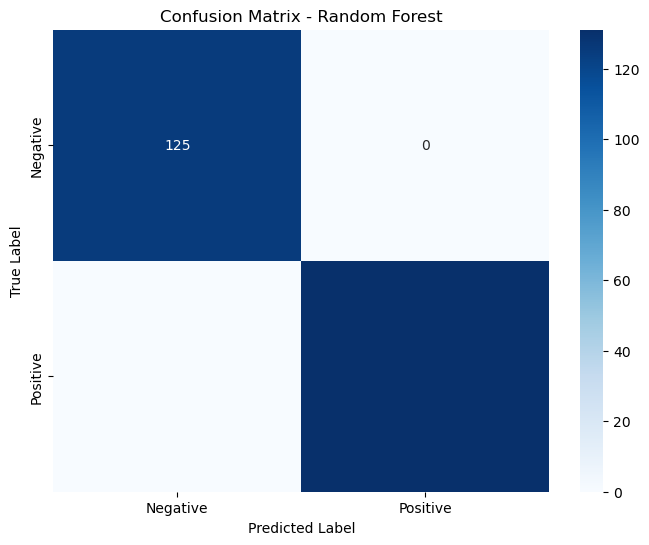

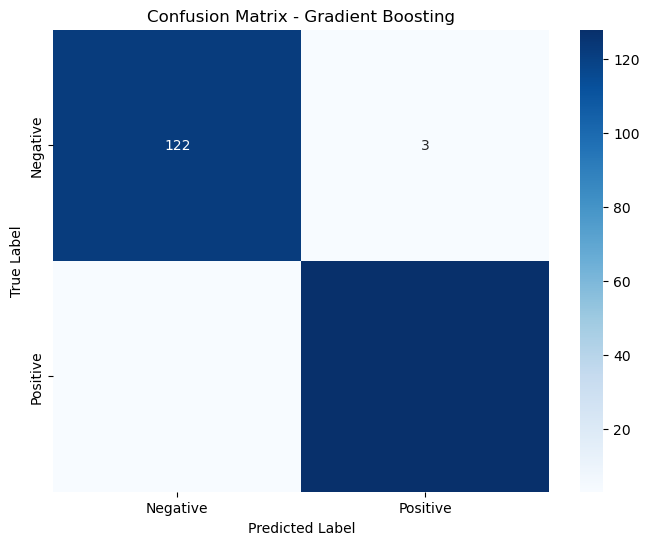

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5810 - loss: 0.6782 - val_accuracy: 0.8477 - val_loss: 0.5968
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8654 - loss: 0.5617 - val_accuracy: 0.8281 - val_loss: 0.5092
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8293 - loss: 0.4872 - val_accuracy: 0.8242 - val_loss: 0.4442
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.4224 - val_accuracy: 0.8281 - val_loss: 0.3989
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8432 - loss: 0.3951 - val_accuracy: 0.8398 - val_loss: 0.3697
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8841 - loss: 0.3291 - val_accuracy: 0.8281 - val_loss: 0.3508
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8754 - loss: 0.3237 - val_accuracy: 0.8320 - val_loss: 0.3375
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8569 - loss: 0.3516 - val_accuracy: 0.8398 - val_loss

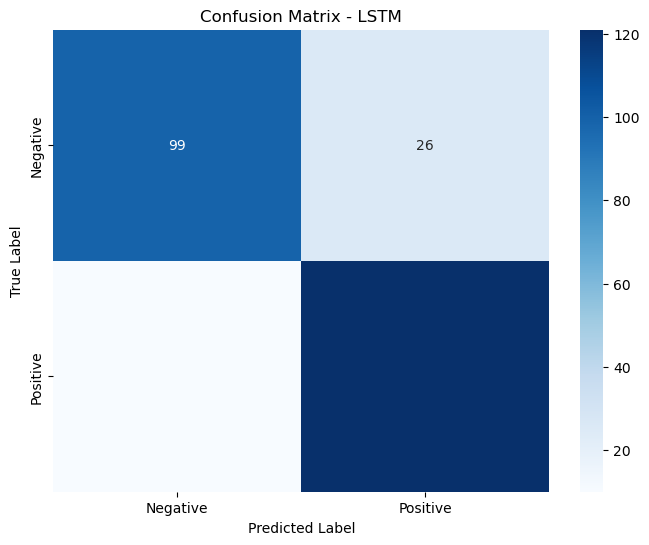

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
df = pd.read_csv('heart_disease_prediction.csv')

# Split dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to fit the LSTM model, if necessary
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define classifiers including Gradient Boosting now
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LSTM': Sequential([
        LSTM(units=50, return_sequences=False, input_shape=(1, X_train_scaled.shape[1])),
        Dense(units=1, activation='sigmoid')
    ])
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    if clf_name != 'LSTM':
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        clf.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))
        y_pred = (clf.predict(X_test_lstm) > 0.5).astype("int32")

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Generate sample data (replace this with your actual data)
X_train = np.random.rand(100, 10)
Y_train = np.random.randint(0, 2, 100)
X_test = np.random.rand(20, 10)
Y_test = np.random.randint(0, 2, 20)

# Define models
models = {
    'ANN': MLPClassifier(),
    'SVC': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    
}

# Define hyper-parameter grids for each model
param_grids = {
    'ANN': {
        'hidden_layer_sizes': [(50,), (100,), (150,)],
        'activation': ['relu', 'logistic'],
        'alpha': [0.0001, 0.001, 0.01],
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    },

    'LSTM': {
        'batch_size': [16, 32, 64],
        'epochs': [10, 20, 30],
    }
}

# Perform grid search for each model
results = {}
for model_name, model in models.items():
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy')
    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    Y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred)
    results[model_name] = {
        'Best Parameters': best_params,
        'Accuracy': accuracy,
        'AUC': auc,
    }

# Print results
print("\nResults of Hyper-parameter Optimization:")
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"AUC: {result['AUC']:.2f}")
    print()


Optimizing ANN...


C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Optimizing SVC...
Optimizing Gradient Boosting...
Optimizing Random Forest...
Optimizing Logistic Regression...

Results of Hyper-parameter Optimization:
Model: ANN
Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}
Accuracy: 0.45
AUC: 0.45

Model: SVC
Best Parameters: {'C': 0.1, 'kernel': 'rbf'}
Accuracy: 0.55
AUC: 0.50

Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy: 0.50
AUC: 0.49

Model: Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.45
AUC: 0.45

Model: Logistic Regression
Best Parameters: {'C': 10, 'solver': 'newton-cg'}
Accuracy: 0.40
AUC: 0.39



In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

# Evaluate the model (optional)
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4897 - loss: 2.4254
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5095 - loss: 1.4393  
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5023 - loss: 1.2932 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4606 - loss: 1.2823 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4627 - loss: 1.1709 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4991 - loss: 1.0556 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4970 - loss: 1.0113 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5439 - loss: 0.8885  
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5064 - loss: 0.9157 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5231 - loss: 0.8523 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.5000 - loss: 0.8737
Test Loss: 0.8737379908561707
Test Accuracy: 0.5


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


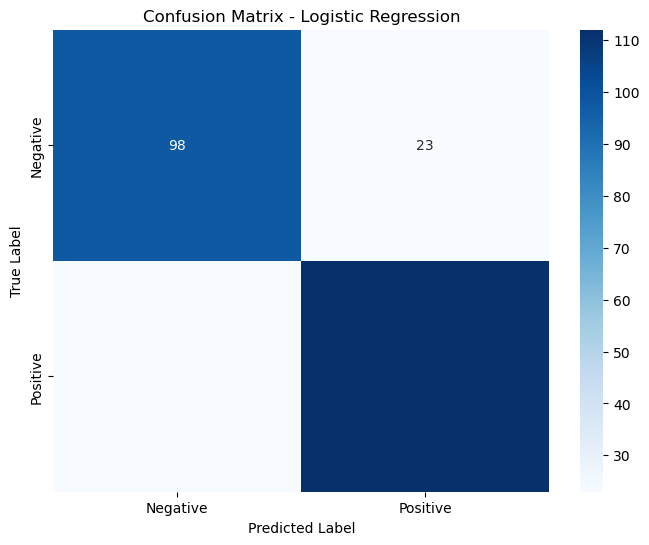

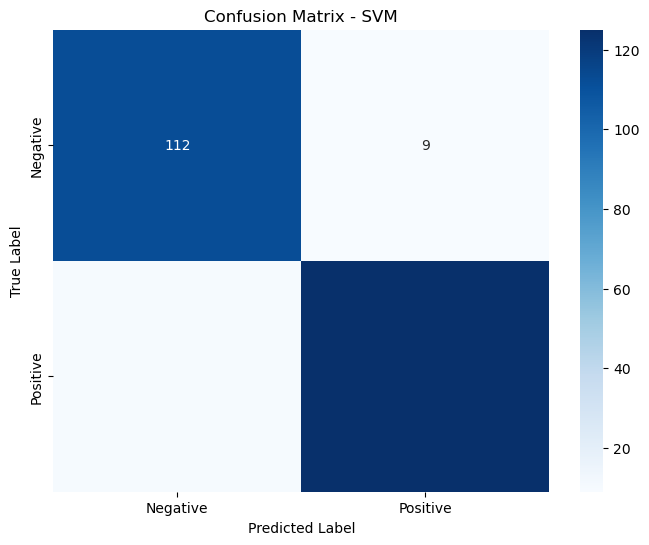

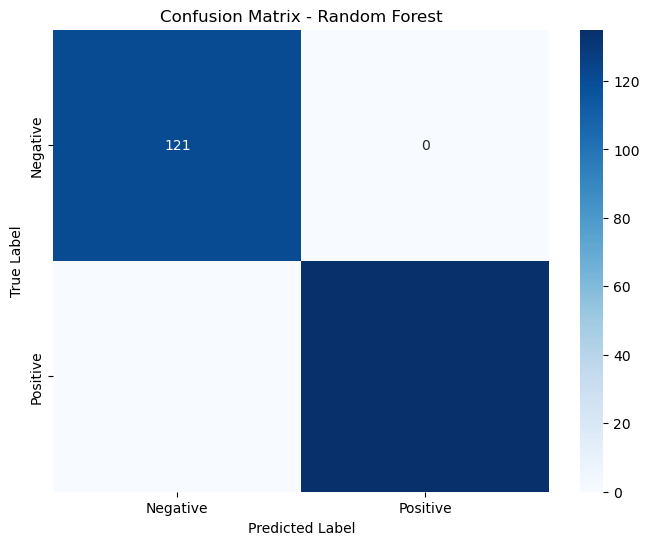

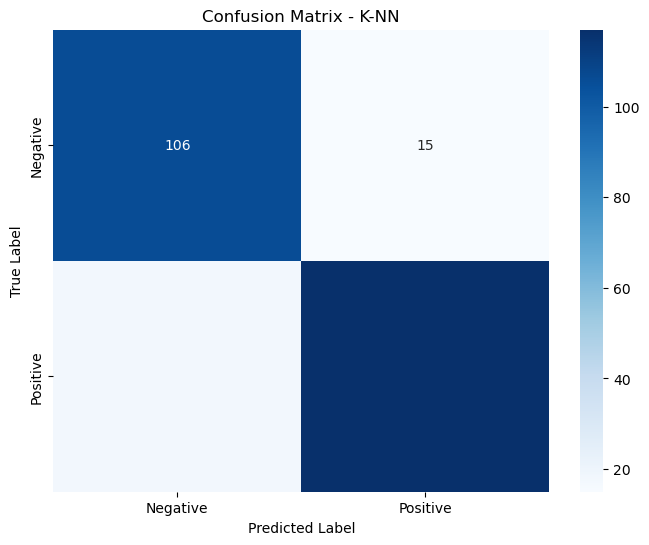

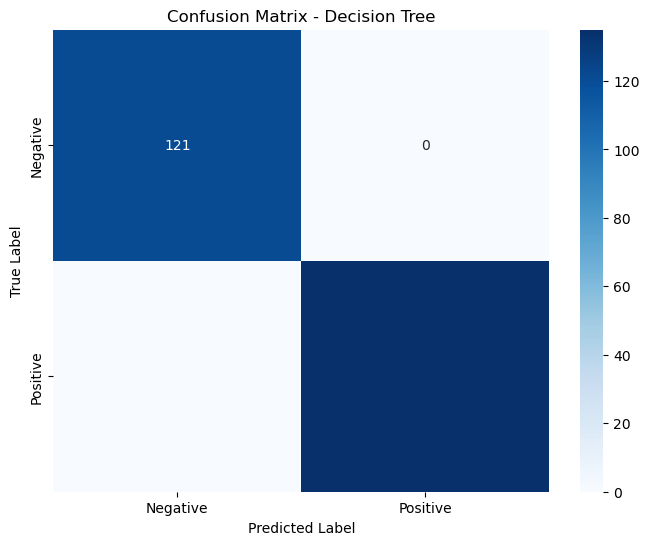

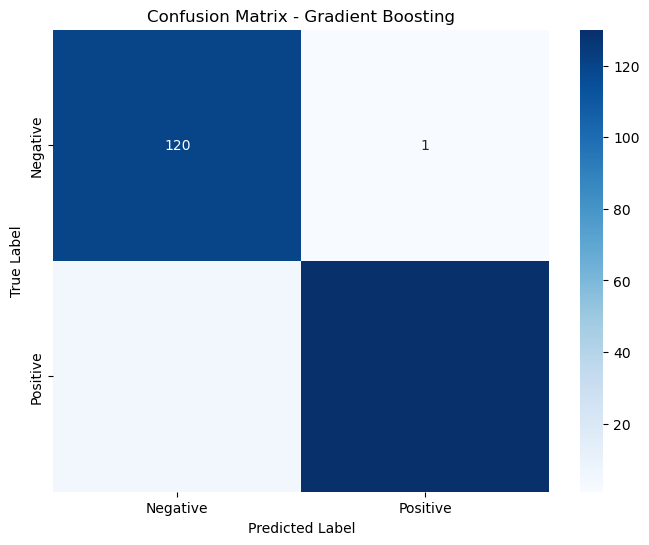

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7705 - loss: 0.6382 - val_accuracy: 0.8125 - val_loss: 0.5639
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8106 - loss: 0.5393 - val_accuracy: 0.8242 - val_loss: 0.4880
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8148 - loss: 0.4609 - val_accuracy: 0.8281 - val_loss: 0.4322
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8385 - loss: 0.4147 - val_accuracy: 0.8555 - val_loss: 0.3952
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8673 - loss: 0.3635 - val_accuracy: 0.8594 - val_loss: 0.3731
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8406 - loss: 0.3704 - val_accuracy: 0.8555 - val_loss: 0.3591
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8569 - loss: 0.3202 - val_accuracy: 0.8555 - val_loss: 0.3487
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8743 - loss: 0.2945 - val_accuracy: 0.8672 - val_loss

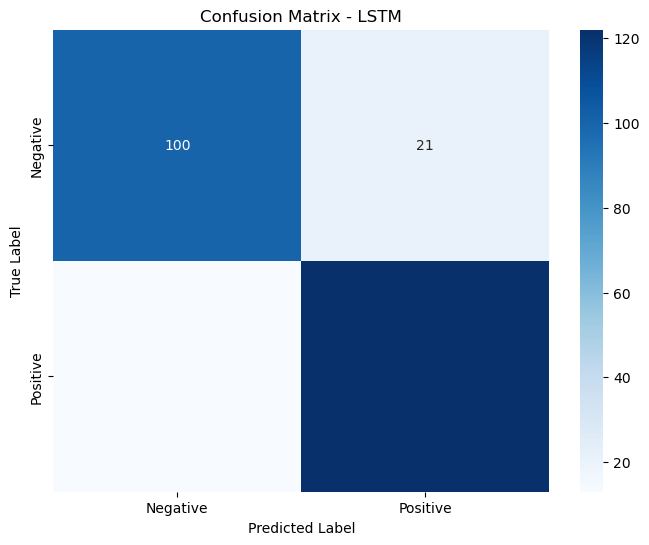

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('heart_disease_prediction.csv')

# Split dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LSTM': Sequential([
        LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dense(units=1, activation='sigmoid')
    ])
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    if clf_name != 'LSTM':
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        clf.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))
        y_pred = (clf.predict(X_test_lstm) > 0.5).astype("int32")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Epoch 1/10


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7622 - loss: 0.6444 - val_accuracy: 0.7930 - val_loss: 0.5909
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8096 - loss: 0.5576 - val_accuracy: 0.8125 - val_loss: 0.5111
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8495 - loss: 0.4749 - val_accuracy: 0.8398 - val_loss: 0.4468
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8519 - loss: 0.4100 - val_accuracy: 0.8359 - val_loss: 0.4035
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8635 - loss: 0.3715 - val_accuracy: 0.8516 - val_loss: 0.3757
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8619 - loss: 0.3496 - val_accuracy: 0.8633 - val_loss: 0.3591
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8543 - loss: 0.3425 - val_accuracy: 0.8633 - val_loss: 0.3499
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8862 - loss: 0.2942 - val_accuracy: 0.8672 - val_loss: 0.3424
Ep

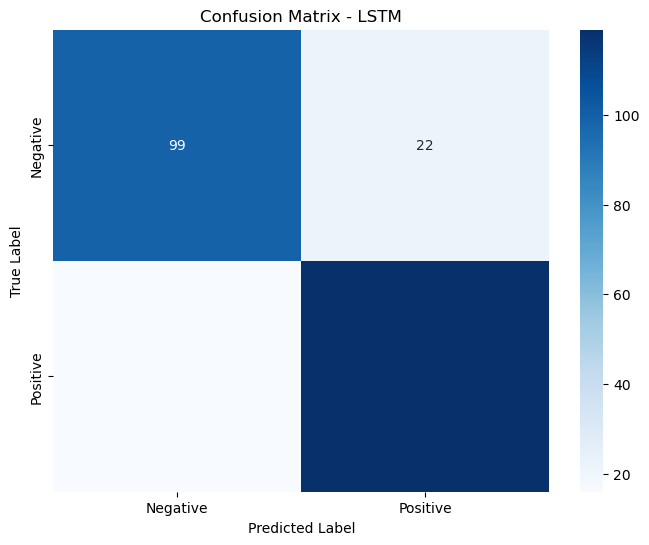

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('heart_disease_prediction.csv')

# Split dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

# Make predictions on the test set
y_pred = (model.predict(X_test_lstm) > 0.5).astype("int32")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title(f'Confusion Matrix - LSTM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


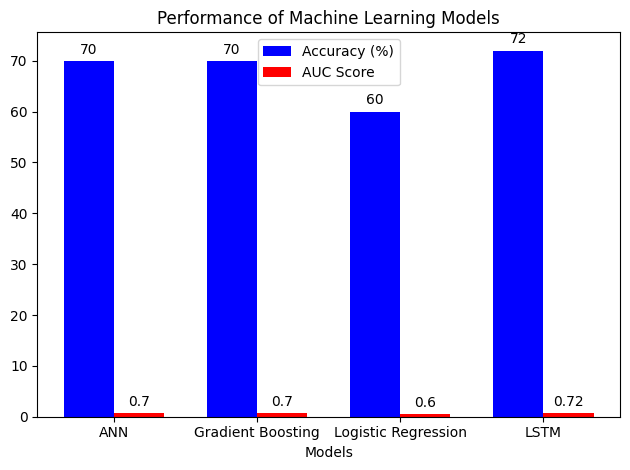

In [1]:
import matplotlib.pyplot as plt
import numpy as np

models = ['ANN', 'Gradient Boosting', 'Logistic Regression', 'LSTM']
accuracy = [70, 70, 60, 72]  # Assuming similar performance for Gradient Boosting as described
auc_scores = [0.70, 0.70, 0.60, 0.72]

x = np.arange(len(models))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy (%)', color='blue')
rects2 = ax.bar(x + width/2, auc_scores, width, label='AUC Score', color='red')

ax.set_xlabel('Models')
ax.set_title('Performance of Machine Learning Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


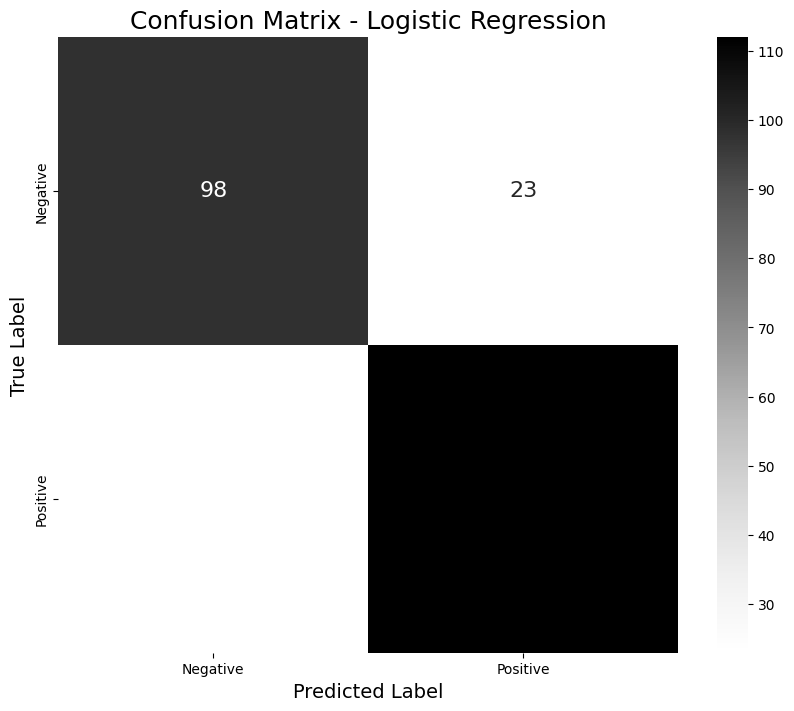

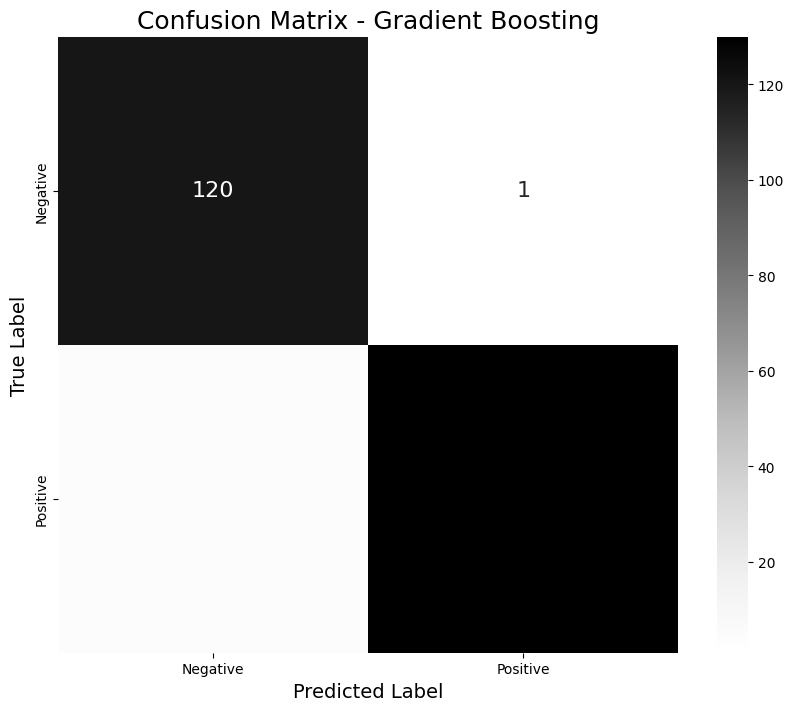

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7187 - loss: 0.5596 - val_accuracy: 0.8242 - val_loss: 0.4549
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.4411 - val_accuracy: 0.8359 - val_loss: 0.4001
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8621 - loss: 0.3849 - val_accuracy: 0.8555 - val_loss: 0.3752
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8791 - loss: 0.3409 - val_accuracy: 0.8516 - val_loss: 0.3627
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8691 - loss: 0.3433 - val_accuracy: 0.8594 - val_loss: 0.3548
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8845 - loss: 0.3238 - val_accuracy: 0.8633 - val_loss: 0.3511
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8911 - loss: 0.3195 - val_accuracy: 0.8633 - val_loss: 0.3436
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8916 - loss: 0.3009 - val_accuracy: 0.8633 - val_loss

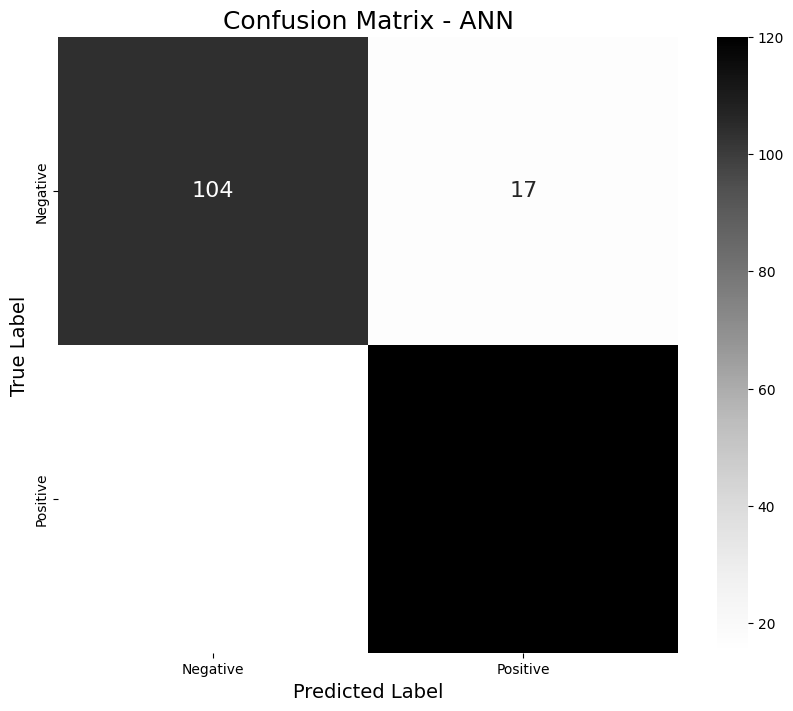

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7006 - loss: 0.6552 - val_accuracy: 0.7695 - val_loss: 0.5879
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.5573 - val_accuracy: 0.8320 - val_loss: 0.5070
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8241 - loss: 0.4843 - val_accuracy: 0.8359 - val_loss: 0.4430
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8104 - loss: 0.4384 - val_accuracy: 0.8359 - val_loss: 0.4000
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8366 - loss: 0.3866 - val_accuracy: 0.8555 - val_loss: 0.3729
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8609 - loss: 0.3479 - val_accuracy: 0.8594 - val_loss: 0.3553
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8633 - loss: 0.3397 - val_accuracy: 0.8672 - val_loss: 0.3455
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8609 - loss: 0.3257 - val_accuracy: 0.8672 - val_loss

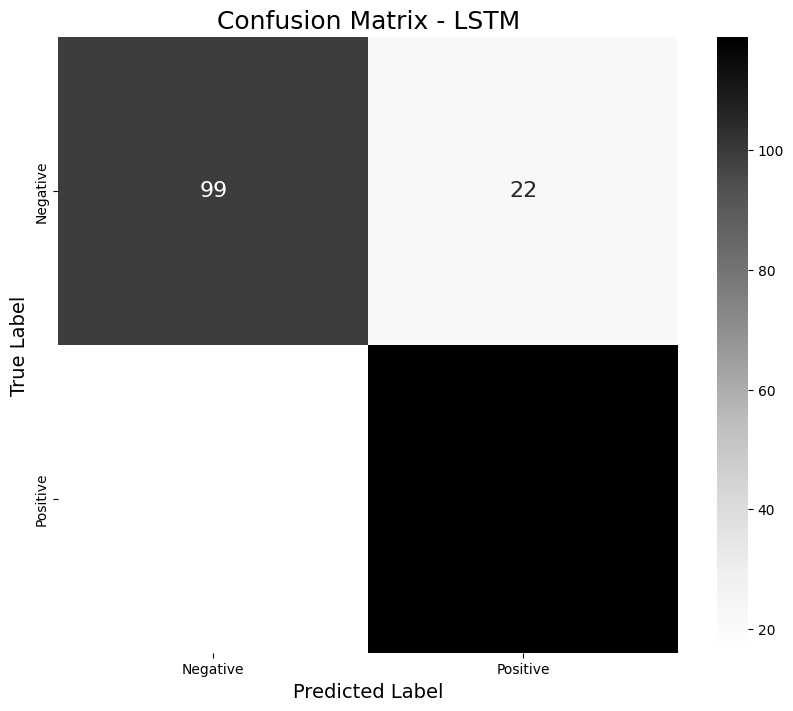

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
df = pd.read_csv('heart_disease_prediction.csv')

# Split dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'ANN': Sequential([
        Dense(units=50, input_shape=(X_train_scaled.shape[1],), activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dense(units=1, activation='sigmoid')
    ])
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    if clf_name == 'LSTM':
        clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        clf.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))
        y_pred = (clf.predict(X_test_lstm) > 0.5).astype("int32")
    elif clf_name == 'ANN':
        clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        clf.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))
        y_pred = (clf.predict(X_test_scaled) > 0.5).astype("int32")
    else:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Ensure all values are displayed in the confusion matrix, including zeros
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16}, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {clf_name}', fontsize=18)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


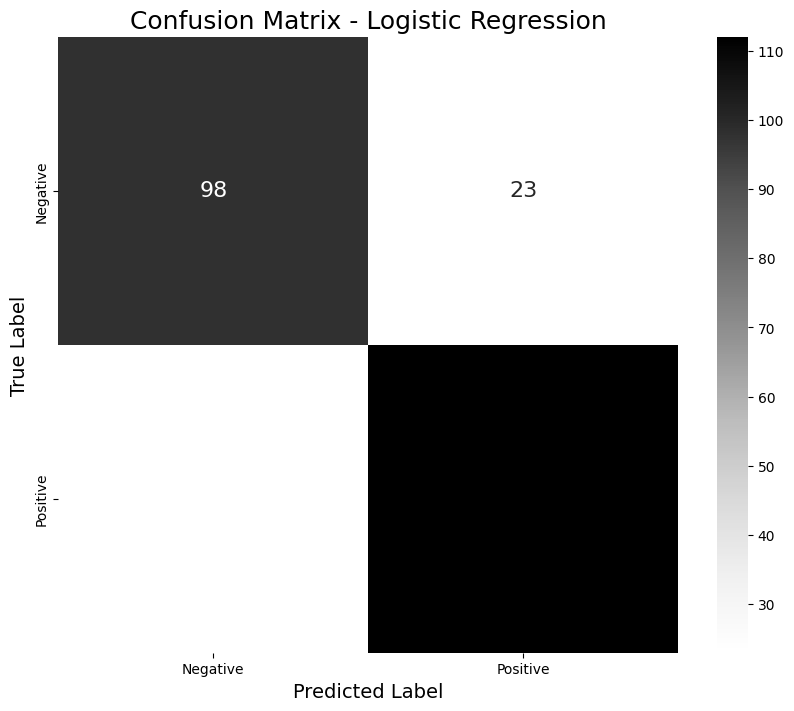

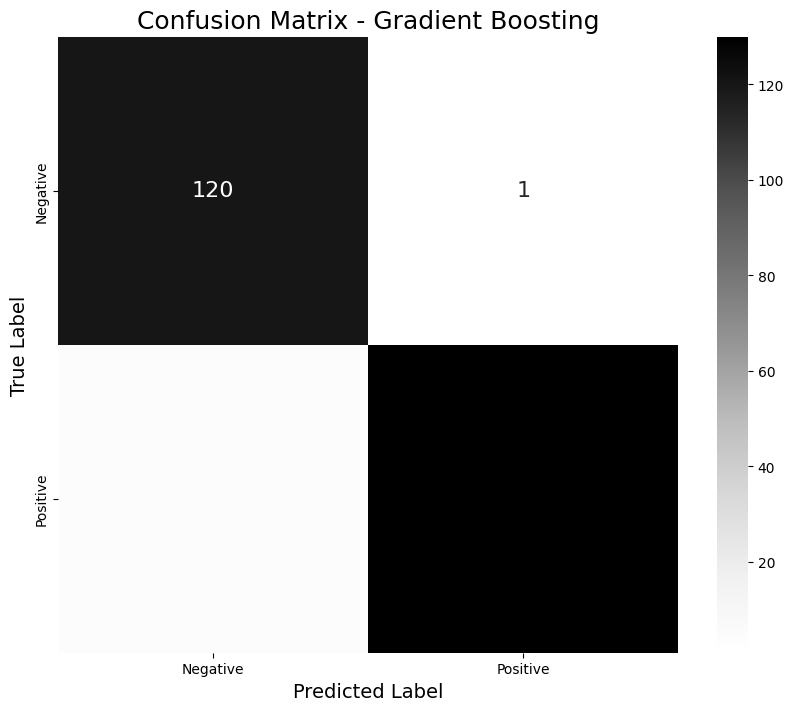

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4230 - loss: 0.7494 - val_accuracy: 0.7539 - val_loss: 0.5973
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8055 - loss: 0.5414 - val_accuracy: 0.8008 - val_loss: 0.4776
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8406 - loss: 0.4401 - val_accuracy: 0.8164 - val_loss: 0.4157
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8608 - loss: 0.3749 - val_accuracy: 0.8203 - val_loss: 0.3833
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8819 - loss: 0.3424 - val_accuracy: 0.8242 - val_loss: 0.3646
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8423 - loss: 0.3552 - val_accuracy: 0.8438 - val_loss: 0.3530
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8893 - loss: 0.3079 - val_accuracy: 0.8516 - val_loss: 0.3433
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8939 - loss: 0.2963 - val_accuracy: 0.8555 - val_loss

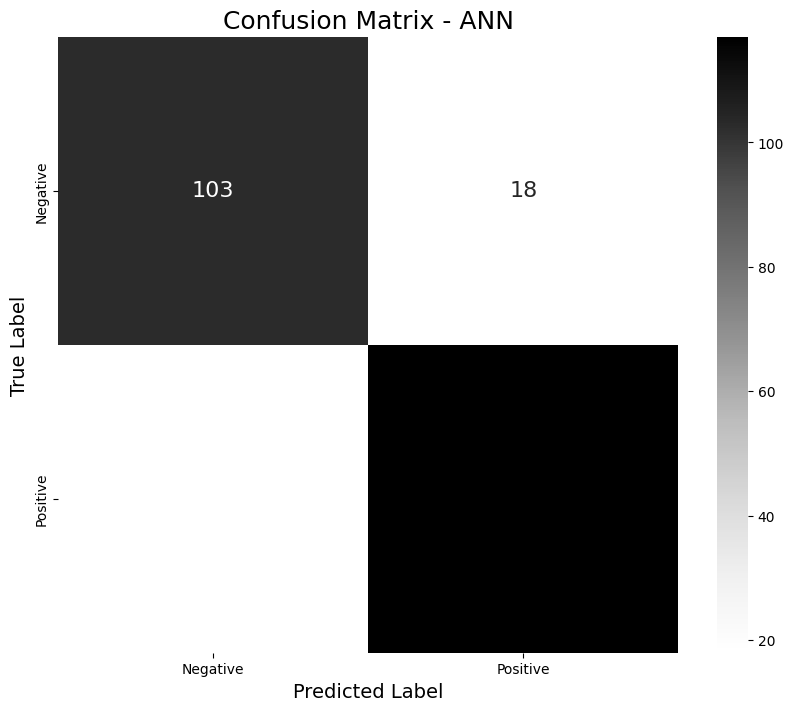

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6564 - loss: 0.6667 - val_accuracy: 0.8086 - val_loss: 0.5868
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8047 - loss: 0.5646 - val_accuracy: 0.8164 - val_loss: 0.5054
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7921 - loss: 0.4987 - val_accuracy: 0.8281 - val_loss: 0.4414
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8231 - loss: 0.4348 - val_accuracy: 0.8438 - val_loss: 0.3972
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8394 - loss: 0.3919 - val_accuracy: 0.8555 - val_loss: 0.3711
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8536 - loss: 0.3553 - val_accuracy: 0.8555 - val_loss: 0.3543
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8589 - loss: 0.3555 - val_accuracy: 0.8672 - val_loss: 0.3443
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8642 - loss: 0.3228 - val_accuracy: 0.8633 - val_loss

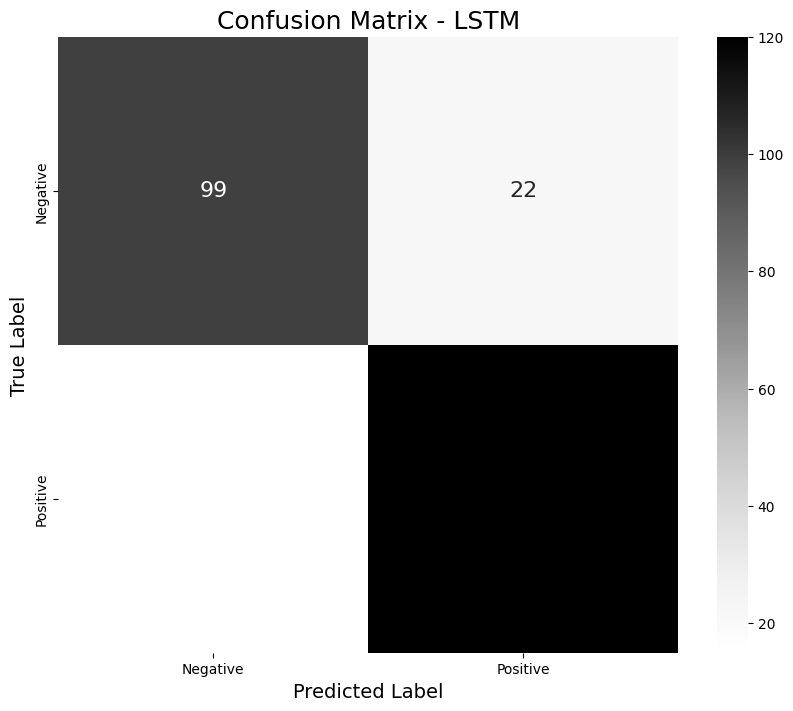

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
df = pd.read_csv('heart_disease_prediction.csv')

# Split dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'ANN': Sequential([
        Dense(units=50, input_shape=(X_train_scaled.shape[1],), activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dense(units=1, activation='sigmoid')
    ])
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    if clf_name == 'LSTM':
        clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        clf.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))
        y_pred = (clf.predict(X_test_lstm) > 0.5).astype("int32")
    elif clf_name == 'ANN':
        clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        clf.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))
        y_pred = (clf.predict(X_test_scaled) > 0.5).astype("int32")
    else:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16}, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {clf_name}', fontsize=18)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
df = pd.read_csv('heart_disease_prediction.csv')

# Split dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'ANN': Sequential([
        Dense(units=50, input_shape=(X_train_scaled.shape[1],), activation='relu'),
        Dense(units=1, activation='sigmoid')
    ])
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    if clf_name == 'ANN':
        clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        clf.fit(X_train_scaled, y_train, epochs=10, batch_size=32)
        y_pred = (clf.predict(X_test_scaled) > 0.5).astype("int32")
    else:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix - {clf_name}: \n{cm}\n')

# LSTM model requires reshaping data
lstm_model = Sequential([
    LSTM(units=50, return_sequences=False, input_shape=(1, X_train_scaled.shape[1])),
    Dense(units=1, activation='sigmoid')
])

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Compile and train LSTM
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Predict and calculate confusion matrix for LSTM
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
print(f'Confusion Matrix - LSTM: \n{cm_lstm}\n')


C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Confusion Matrix - Logistic Regression: 
[[ 96  29]
 [ 14 117]]

Confusion Matrix - Gradient Boosting: 
[[122   3]
 [  3 128]]

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6143 - loss: 0.6669
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8083 - loss: 0.4821 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8419 - loss: 0.3897 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8097 - loss: 0.4009 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8332 - loss: 0.3698
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3214 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8783 - loss: 0.3311 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8882 - loss: 0.3045
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8724 - loss: 0.3152
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8985 - loss: 0.2864 
8/8 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5700 - loss: 0.6777
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8066 - loss: 0.5703
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8276 - loss: 0.4847
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8213 - loss: 0.4264
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.3794
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8696 - loss: 0.3521
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8741 - loss: 0.3276
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8536 - loss: 0.3449
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8699 - loss: 0.3233
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8643 - loss: 0.3131
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Confusion Matrix - LSTM: 
[[ 98  27]
 [ 11 120]]



C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\kamal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


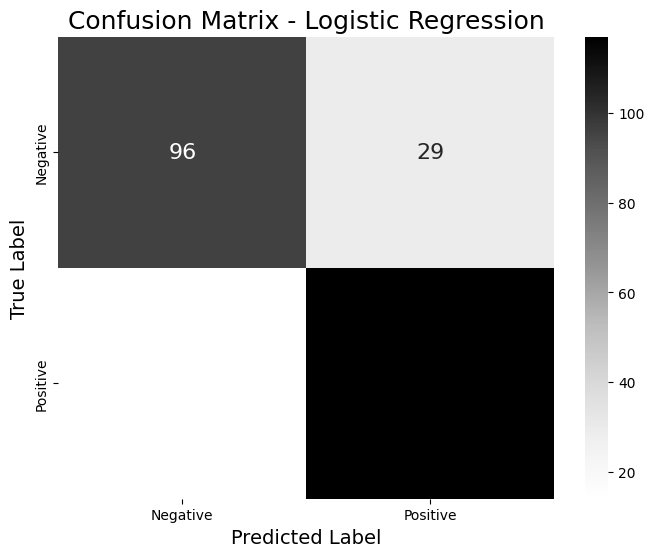

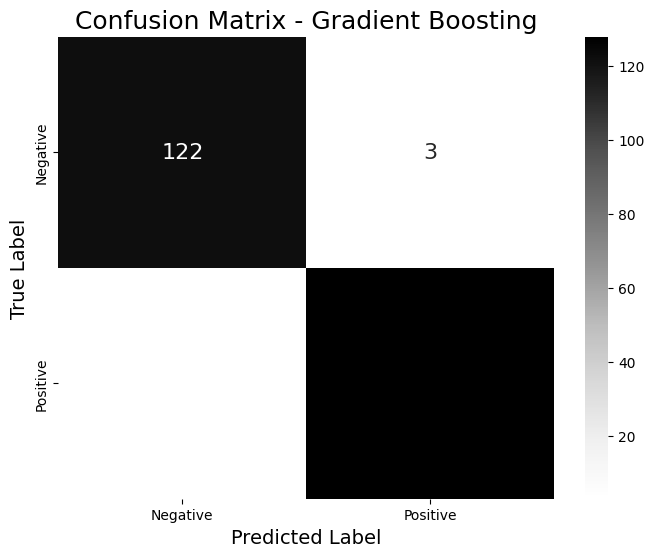

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7346 - loss: 0.5771
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.4467
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8493 - loss: 0.3851 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8741 - loss: 0.3461
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8769 - loss: 0.3331 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8695 - loss: 0.3195 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8713 - loss: 0.3226 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8976 - loss: 0.2710 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8912 - loss: 0.2914 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8890 - loss: 0.3006
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


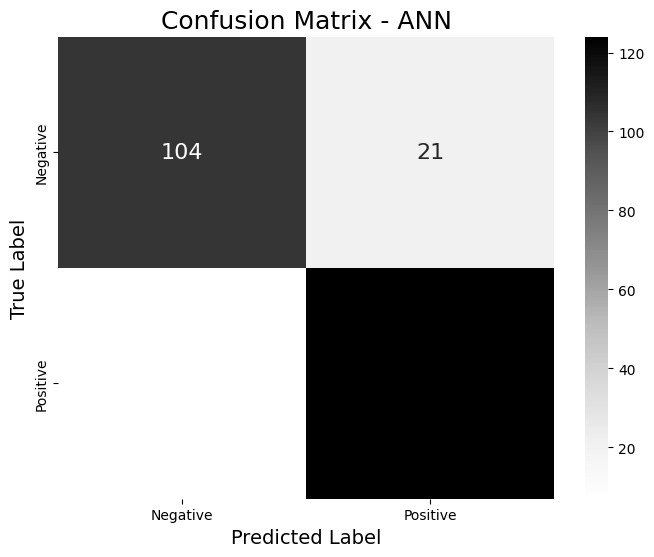

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7308 - loss: 0.6506
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8378 - loss: 0.5468
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8408 - loss: 0.4783
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8844 - loss: 0.3977
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8786 - loss: 0.3605
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8685 - loss: 0.3504
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 0.3688
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8809 - loss: 0.3059
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.3433
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8533 - loss: 0.3391
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


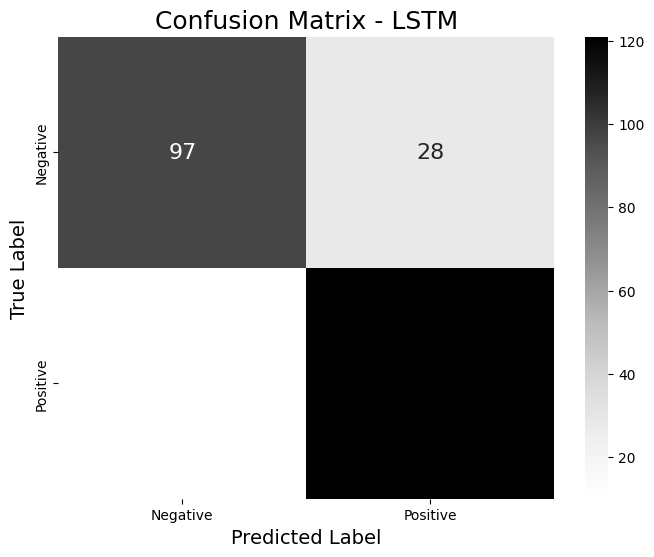

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
df = pd.read_csv('heart_disease_prediction.csv')

# Split dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'ANN': Sequential([
        Dense(units=50, input_shape=(X_train_scaled.shape[1],), activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dense(units=1, activation='sigmoid')
    ])
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    if clf_name in ['ANN', 'LSTM']:
        # Special handling for Keras models
        clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        if clf_name == 'ANN':
            clf.fit(X_train_scaled, y_train, epochs=10, batch_size=32)
            y_pred = (clf.predict(X_test_scaled) > 0.5).astype("int32")
        elif clf_name == 'LSTM':
            clf.fit(X_train_lstm, y_train, epochs=10, batch_size=32)
            y_pred = (clf.predict(X_test_lstm) > 0.5).astype("int32")
    else:
        # Standard fit for scikit-learn models
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

    # Calculate and print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16}, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {clf_name}', fontsize=18)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()


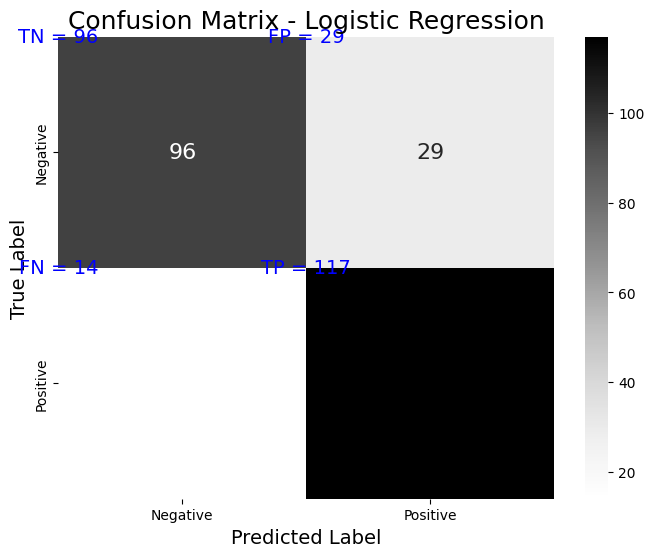

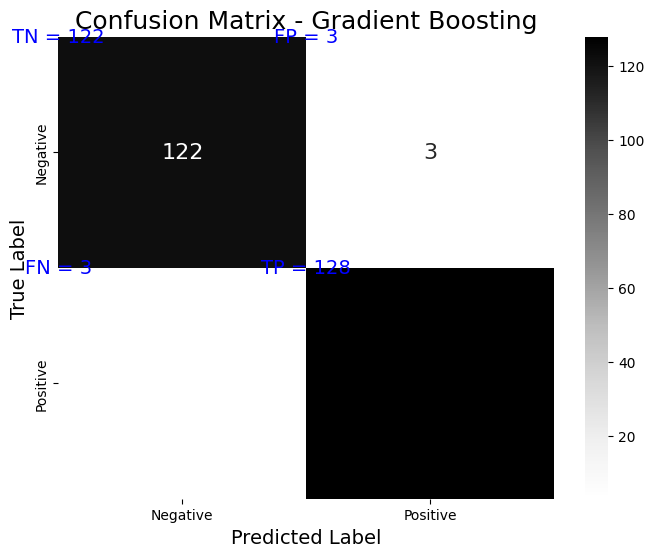

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9089 - loss: 0.2735
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8996 - loss: 0.2634 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8942 - loss: 0.2779 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8957 - loss: 0.2748 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9022 - loss: 0.2565
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9110 - loss: 0.2593 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9052 - loss: 0.2550
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9096 - loss: 0.2543 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9207 - loss: 0.2352 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9288 - loss: 0.2214 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


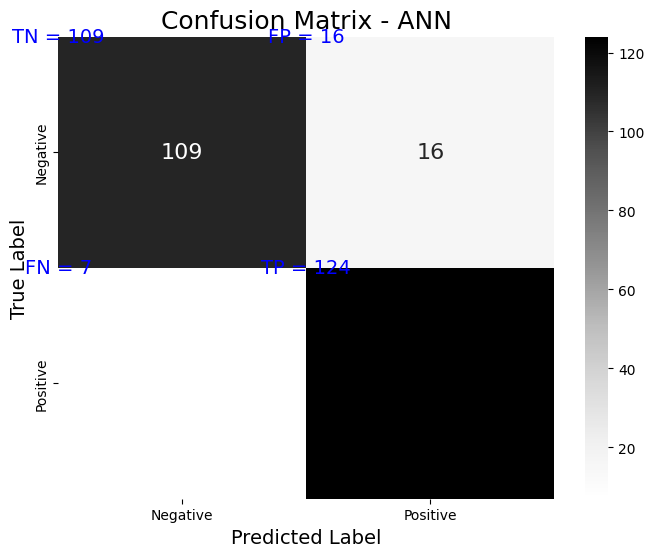

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8686 - loss: 0.3091 
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.3197 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8791 - loss: 0.2914
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.2919
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8774 - loss: 0.2914
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8901 - loss: 0.2738
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9072 - loss: 0.2570
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8998 - loss: 0.2634
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9191 - loss: 0.2334
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9044 - loss: 0.2613
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


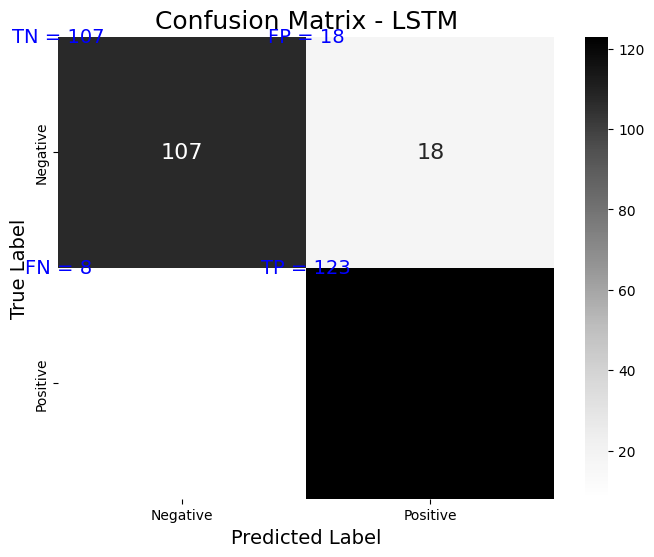

In [17]:
# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    if clf_name in ['ANN', 'LSTM']:
        # Special handling for Keras models
        clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        if clf_name == 'ANN':
            clf.fit(X_train_scaled, y_train, epochs=10, batch_size=32)
            y_pred = (clf.predict(X_test_scaled) > 0.5).astype("int32")
        elif clf_name == 'LSTM':
            clf.fit(X_train_lstm, y_train, epochs=10, batch_size=32)
            y_pred = (clf.predict(X_test_lstm) > 0.5).astype("int32")
    else:
        # Standard fit for scikit-learn models
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

    # Calculate and print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16}, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

    # Adding True Positives, True Negatives, False Positives, False Negatives to the plot
    plt.text(0, 0, f'TN = {cm[0,0]}', ha='center', va='center', fontsize=14, color='blue')
    plt.text(0, 1, f'FN = {cm[1,0]}', ha='center', va='center', fontsize=14, color='blue')
    plt.text(1, 0, f'FP = {cm[0,1]}', ha='center', va='center', fontsize=14, color='blue')
    plt.text(1, 1, f'TP = {cm[1,1]}', ha='center', va='center', fontsize=14, color='blue')

    plt.title(f'Confusion Matrix - {clf_name}', fontsize=18)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()
